In [1]:
import pandas as pd
from glob import glob as glob
from tqdm import tqdm_notebook
import json
import numpy as np
import natsort

In [2]:
files = glob('../SASA/P*')

model_map={}

for file in files:
 
    with open(file, 'r') as f:
        pos_map = {}
        for line in f.readlines()[1:]:
            els = line.split()
            pos_map[els[1]+els[2]] = dict(AA=els[3],
                                          ACCESS=float(els[4]),
                                          RELACC=float(els[5]),
                                          SCACC=float(els[6]),
                                          SCRELACC=float(els[7]))
    model_map[file.split('/')[-1]] = pos_map

In [3]:
model_map['P1']

{'H1': {'AA': 'GLU',
  'ACCESS': 175.599,
  'RELACC': 101.956,
  'SCACC': 109.531,
  'SCRELACC': 81.369},
 'H10': {'AA': 'ASP',
  'ACCESS': 86.81,
  'RELACC': 61.826,
  'SCACC': 66.645,
  'SCRELACC': 64.956},
 'H100': {'AA': 'GLY',
  'ACCESS': 62.713,
  'RELACC': 78.04,
  'SCACC': 0.0,
  'SCRELACC': 0.0},
 'H100A': {'AA': 'TRP',
  'ACCESS': 125.736,
  'RELACC': 50.486,
  'SCACC': 122.734,
  'SCRELACC': 58.198},
 'H100B': {'AA': 'TYR',
  'ACCESS': 37.686,
  'RELACC': 17.774,
  'SCACC': 37.567,
  'SCRELACC': 21.271},
 'H100C': {'AA': 'GLU',
  'ACCESS': 50.98,
  'RELACC': 29.6,
  'SCACC': 50.98,
  'SCRELACC': 37.872},
 'H100D': {'AA': 'ALA',
  'ACCESS': 8.831,
  'RELACC': 8.185,
  'SCACC': 8.749,
  'SCRELACC': 12.637},
 'H100E': {'AA': 'PHE',
  'ACCESS': 20.981,
  'RELACC': 10.528,
  'SCACC': 20.981,
  'SCRELACC': 12.801},
 'H100F': {'AA': 'PHE',
  'ACCESS': 0.498,
  'RELACC': 0.25,
  'SCACC': 0.498,
  'SCRELACC': 0.304},
 'H101': {'AA': 'GLN',
  'ACCESS': 6.716,
  'RELACC': 3.769,
  'SCA

In [4]:
with open('/home/gil/AbPyTools/abpytools/data/NumberingSchemes.json') as f:
    data = json.load(f)['chothia']
    heavy_data = data['heavy']
    light_data = data['light']
    
    numbering_data = [*heavy_data, *light_data]

In [5]:
def vector_representation(data, column='RELACC', fillna=0):
    """
    Function to represent accessibility data in matrix form
    
    :type data: dict
    
    :param data: data from clusterer
    
    :rtype: dict
    :return: returns dict with same keys as data containing a dict 
             with the vector for each position
             
    Explanation:
    ------------
    
    Each vector has the following format:
    
    [ACCESS H1, ACCESS H2, ..., ACCESS H114, ACCESS L1, ACCESS L2, ..., ACCESS L111]
        
    Each elemeent either takes up the value of 0 (no contact) or 1 (contact)
    
    """
    
    result = dict()
    
    values = np.zeros((len(data), len(numbering_data)))
    
    keys = list()
    
    for i, key in enumerate(tqdm_notebook(natsort.natsorted(data.keys()))):
        
        keys.append(key)
        
        value = data[key]
                
        for j, pos in enumerate(numbering_data):
            
            try:
                values[i][j] = value[pos][column]
            except KeyError:
                values[i][j] = fillna
                
    return pd.DataFrame(data=values, index=keys, columns=numbering_data)

In [6]:
access_matrix = vector_representation(model_map)

HBox(children=(IntProgress(value=0, max=900), HTML(value='')))

In [52]:
model_map['P1']

{'H1': {'AA': 'GLU',
  'ACCESS': 175.599,
  'RELACC': 101.956,
  'SCACC': 109.531,
  'SCRELACC': 81.369},
 'H10': {'AA': 'ASP',
  'ACCESS': 86.81,
  'RELACC': 61.826,
  'SCACC': 66.645,
  'SCRELACC': 64.956},
 'H100': {'AA': 'GLY',
  'ACCESS': 62.713,
  'RELACC': 78.04,
  'SCACC': 0.0,
  'SCRELACC': 0.0},
 'H100A': {'AA': 'TRP',
  'ACCESS': 125.736,
  'RELACC': 50.486,
  'SCACC': 122.734,
  'SCRELACC': 58.198},
 'H100B': {'AA': 'TYR',
  'ACCESS': 37.686,
  'RELACC': 17.774,
  'SCACC': 37.567,
  'SCRELACC': 21.271},
 'H100C': {'AA': 'GLU',
  'ACCESS': 50.98,
  'RELACC': 29.6,
  'SCACC': 50.98,
  'SCRELACC': 37.872},
 'H100D': {'AA': 'ALA',
  'ACCESS': 8.831,
  'RELACC': 8.185,
  'SCACC': 8.749,
  'SCRELACC': 12.637},
 'H100E': {'AA': 'PHE',
  'ACCESS': 20.981,
  'RELACC': 10.528,
  'SCACC': 20.981,
  'SCRELACC': 12.801},
 'H100F': {'AA': 'PHE',
  'ACCESS': 0.498,
  'RELACC': 0.25,
  'SCACC': 0.498,
  'SCRELACC': 0.304},
 'H101': {'AA': 'GLN',
  'ACCESS': 6.716,
  'RELACC': 3.769,
  'SCA

In [7]:
len(access_matrix)

900

In [8]:
access_matrix

,H1,H2,H3,H4,H5,H6,H6A,H6B,H6C,H6D,...,L103,L104,L105,L106,L106A,L107,L108,L109,L110,L111
P1,101.956,39.551,37.539,4.537,58.441,2.681,0.0,0.0,0.0,0.0,...,61.742,2.028,54.978,20.001,0.000,61.857,74.667,117.715,0.0,0.0
P2,0.000,0.000,56.114,8.061,64.292,7.405,0.0,0.0,0.0,0.0,...,48.628,1.261,41.686,33.701,0.000,57.162,80.680,118.702,0.0,0.0
P3,0.000,22.000,18.131,46.082,23.055,57.408,0.0,0.0,0.0,0.0,...,25.178,13.521,30.220,39.920,0.000,22.593,30.108,16.105,0.0,0.0
P4,95.400,15.133,55.006,6.976,49.314,5.608,0.0,0.0,0.0,0.0,...,55.647,1.458,39.562,22.780,80.991,0.000,0.000,0.000,0.0,0.0
P5,112.230,32.542,43.849,3.425,42.332,3.417,0.0,0.0,0.0,0.0,...,61.497,2.011,53.950,20.040,0.000,62.315,74.019,118.391,0.0,0.0
P6,117.234,22.074,69.913,2.949,60.246,2.837,0.0,0.0,0.0,0.0,...,52.853,2.616,41.693,61.326,0.000,60.506,79.852,119.204,0.0,0.0
P7,105.121,28.663,44.381,5.639,52.625,10.432,0.0,0.0,0.0,0.0,...,59.366,3.316,50.980,26.302,0.000,47.133,82.066,118.505,0.0,0.0
P8,92.440,5.266,67.323,5.444,64.452,5.366,0.0,0.0,0.0,0.0,...,59.463,3.260,51.091,26.586,0.000,46.967,82.321,119.301,0.0,0.0
P9,94.916,14.925,55.579,6.883,49.240,6.178,0.0,0.0,0.0,0.0,...,54.713,1.866,37.445,14.875,81.376,0.000,0.000,0.000,0.0,0.0
P10,0.000,56.362,55.154,2.490,43.916,4.644,0.0,0.0,0.0,0.0,...,53.840,1.359,50.863,55.734,0.000,74.568,0.000,0.000,0.0,0.0


In [9]:
from sklearn.decomposition import PCA, TruncatedSVD
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc("font", family="Times New Roman")

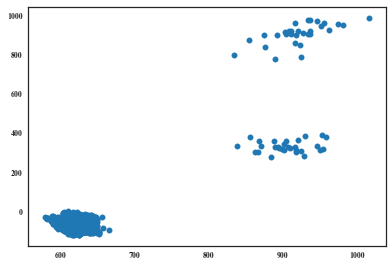

In [10]:
svd = TruncatedSVD()
reduced = svd.fit_transform(access_matrix.as_matrix())
plt.scatter(reduced[:,0], reduced[:,1])

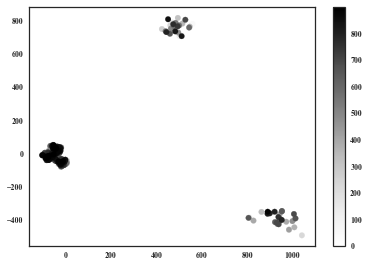

In [11]:
svd = PCA()
reduced = svd.fit_transform(access_matrix.as_matrix())
plt.scatter(reduced[:,0], reduced[:,1], c=range(900))
plt.colorbar()

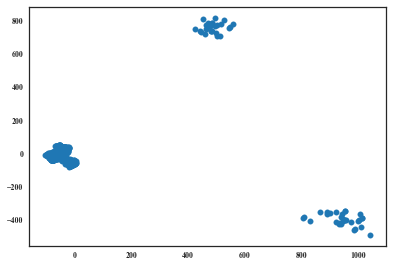

In [12]:
pca = PCA()
reduced = pca.fit_transform(access_matrix.as_matrix())
plt.scatter(reduced[:,0], reduced[:,1])

In [13]:
np.where(reduced[:,0]>700)

(array([  2,  17,  45, 118, 189, 229, 332, 372, 387, 392, 394, 426, 476,
        532, 539, 603, 620, 633, 649, 660, 666, 692, 693, 696, 756, 789,
        791, 798, 821, 888]),)

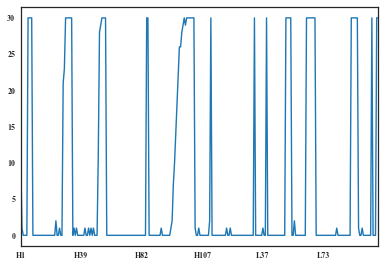

In [19]:
(access_matrix.iloc[np.where(reduced[:,0]>700)] == 0).sum(0).plot()

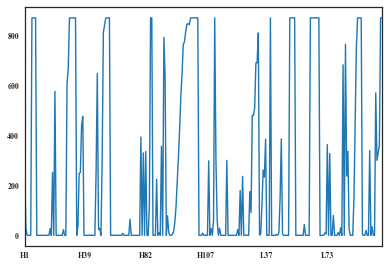

In [20]:
(access_matrix.iloc[np.where(reduced[:,0]<700)] == 0).sum(0).plot()

In [21]:
np.where(np.logical_and(reduced[:,0]<700, reduced[:,0]>300))[0].size

29

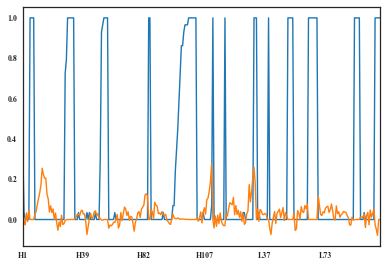

In [23]:
((access_matrix.iloc[np.where(np.logical_and(reduced[:,0]<700, reduced[:,0]>300))] == 0).sum(0) / 29).plot()
plt.plot(pca.components_[0])

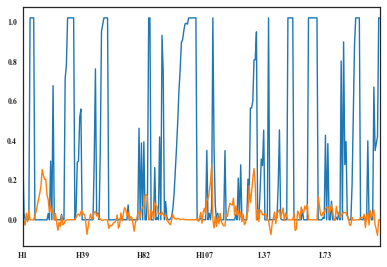

In [25]:
((access_matrix.iloc[np.where(reduced[:,0]<530)] == 0).sum(0) / 850).plot()
plt.plot(pca.components_[0])

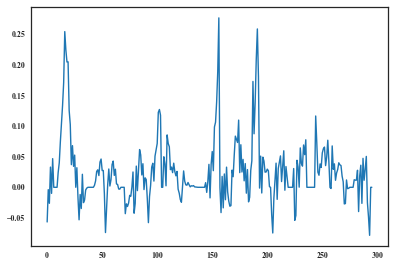

In [26]:
plt.plot(pca.components_[0])

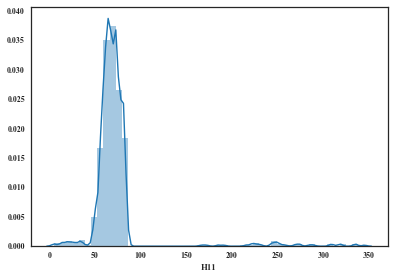

In [27]:
sns.distplot(access_matrix['H11'])

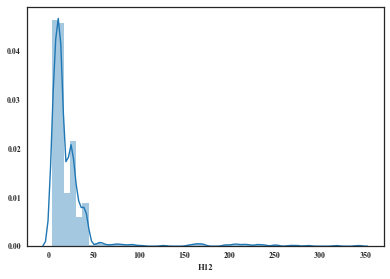

In [28]:
sns.distplot(access_matrix['H12'])

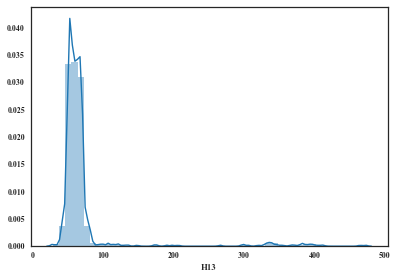

In [29]:
sns.distplot(access_matrix['H13'])

In [30]:
i=0
for aa, component in zip(numbering_data, pca.components_[0]):
    print('{:<5} {:<5} {:.4f}'.format(i, aa, component))
    i+=1

0     H1    -0.0566
1     H2    -0.0038
2     H3    -0.0261
3     H4    0.0330
4     H5    -0.0099
5     H6    0.0468
6     H6A   -0.0000
7     H6B   -0.0000
8     H6C   -0.0000
9     H6D   -0.0000
10    H7    0.0241
11    H8    0.0401
12    H9    0.0746
13    H10   0.1034
14    H11   0.1337
15    H12   0.1708
16    H13   0.2542
17    H14   0.2241
18    H15   0.2046
19    H16   0.2048
20    H17   0.1253
21    H18   0.1026
22    H19   0.0369
23    H20   0.0680
24    H21   0.0342
25    H22   0.0526
26    H23   0.0000
27    H24   0.0320
28    H25   -0.0165
29    H26   -0.0531
30    H27   -0.0117
31    H28   -0.0346
32    H29   0.0212
33    H30   -0.0250
34    H31   -0.0207
35    H31A  -0.0043
36    H31B  -0.0013
37    H31C  -0.0000
38    H31D  -0.0000
39    H31E  -0.0000
40    H31F  -0.0000
41    H31G  -0.0000
42    H31H  -0.0000
43    H32   0.0032
44    H33   0.0104
45    H34   0.0260
46    H35   0.0285
47    H36   0.0192
48    H37   0.0412
49    H38   0.0461
50    H39   0.0273
51    H40

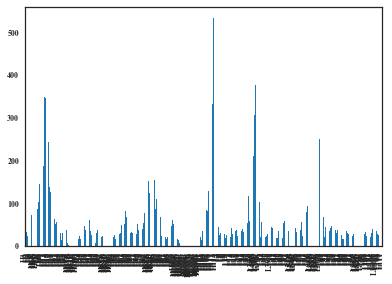

In [31]:
access_matrix.iloc[np.where(reduced[:,0]>1000)].mean().plot('bar')

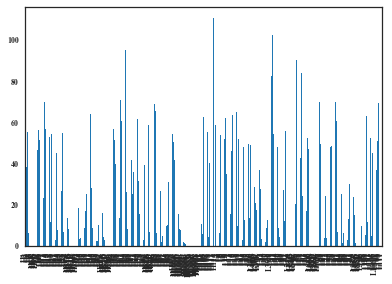

In [32]:
access_matrix.iloc[np.where(reduced[:,0]<1000)].mean().plot('bar')

In [33]:
((access_matrix < 50) & (access_matrix > 0)).astype('int').values

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [34]:
from abpytools import FabCollection, ChainCollection

In [35]:
combinations = pd.read_csv('/home/gil/PhD/Data/UCB/precollection/random_pairs.txt', index_col=0, delimiter=', ')
heavy_chains = ChainCollection(path='/home/gil/PhD/Data/UCB/CombinationData/AbFiles/heavy_chains.json')
heavy_chains.load()
light_chains = ChainCollection(path='/home/gil/PhD/Data/UCB/CombinationData/AbFiles/light_chains.json')
light_chains.load()

/home/gil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Loading in antibody objects


HBox(children=(IntProgress(value=0, max=30), HTML(value='')))


Failed to load 0 objects in list
Loading in antibody objects


HBox(children=(IntProgress(value=0, max=30), HTML(value='')))


Failed to load 0 objects in list


In [36]:
heavy_chains_list=[]
light_chains_list=[]

for heavy, light in  combinations['Random Pairs'].str.split('-'):
    heavy_chains_list.append(heavy_chains.get_object(heavy))
    light_chains_list.append(light_chains.get_object(light))    

In [37]:
fab_collection = FabCollection(None, heavy_chains_list, light_chains_list,
                               names=['P' + str(x) for x in combinations.index.tolist()])

In [38]:
charges = fab_collection.charge()

In [39]:
(((access_matrix < 50) & (access_matrix > 0)).astype('int').values * charges).sum(1)

array([ -6.34992243e-02,  -1.25020939e+00,   2.64771105e+00,
        -5.20814673e+00,  -1.06512849e+00,  -3.14650526e+00,
         1.89200273e+00,   1.97923517e+00,  -4.43137814e+00,
         3.93580047e+00,  -3.06853908e+00,  -4.06141592e+00,
         8.92573448e-01,  -1.10439859e-01,  -1.16936936e+00,
        -9.65790243e-01,   7.08409533e-01,   1.64792539e+00,
        -2.06772217e+00,  -1.00506548e+00,   3.79239505e+00,
        -2.10612217e+00,  -2.02529079e+00,  -3.28828135e+00,
        -2.14790265e+00,   1.83679529e+00,  -2.52722949e-01,
        -4.06914135e+00,   1.89333536e+00,   7.65378734e-02,
        -4.24829263e+00,  -4.28986025e+00,  -9.63593856e-01,
         4.89166816e+00,  -6.68768504e-02,  -6.33960277e-02,
        -3.43747467e+00,  -1.43370268e+00,  -6.56456095e-02,
         7.47980342e-01,  -3.25075837e+00,  -1.58407582e+00,
         3.70915442e+00,  -2.50000667e+00,   9.34242846e-01,
        -4.91787258e-01,   4.93430737e+00,   4.93313439e+00,
        -4.29206308e+00,

In [40]:
thresholds = list(range(0, 100, 5))
charge_list = []

for x in thresholds:
    
    mask = ((access_matrix < x) & (access_matrix > 0)).astype('int').values
    
    charges_i = mask * charges
    
    charge_list.append((charges_i.mean(), charges_i.std()))

In [41]:
charge_list

[(0.0, 0.0),
 (-0.0054148651435391524, 0.098112642072438),
 (-0.0036122559284304939, 0.12523269059306133),
 (-0.0017820315707587409, 0.14308514024848967),
 (-0.0011591413781069837, 0.16326033649651392),
 (6.6325139137479004e-05, 0.17985920848177275),
 (0.00053069502601969852, 0.19817892249585753),
 (-0.0016610487726375933, 0.21412587121497861),
 (-0.0028234987293569748, 0.23033143673554538),
 (-0.0049858952780149814, 0.25105489255616342),
 (-0.002024789794547047, 0.2691658278063338),
 (0.00031080613079798676, 0.28695324951396683),
 (0.0024992328410682009, 0.30294232052110359),
 (0.0057964129030535381, 0.31642863276417682),
 (0.0086956630338435609, 0.32662956726963738),
 (0.010637869105014134, 0.33258738052198517),
 (0.010858665737783626, 0.33723485206627896),
 (0.011022543637360311, 0.34203523745288233),
 (0.010983751111278337, 0.34507848202290242),
 (0.01108989641706966, 0.34671910476286161)]

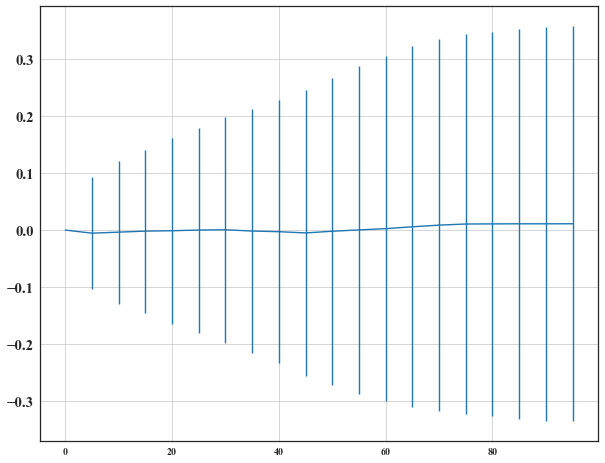

In [42]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 10,
                              'ytick.labelsize': 15, 'legend.fontsize': 15}):
    
    f, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    ax.errorbar(thresholds, [x[0] for x in charge_list], [x[1] for x in charge_list])
#     ax.set_yscale('log')
    ax.grid()

In [43]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l1, l2, l1_l2

Using TensorFlow backend.


In [44]:
data = pd.read_csv('/home/gil/PhD/Data/UCB/Data/Tm/Processed Data/AllTmData.csv', index_col=0)
data.index = ['P' + str(x) for x in data.index]

data = data.join(access_matrix)

data = data[~np.isnan(data['Tm D - Mean'])]

X = data.ix[:,4:].values.astype('float').tolist()
y = data['Tm D - Mean'].values.tolist()

/home/gil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [45]:
X_train, X_test, y_train, y_test = train_test_split(data.ix[:,4:].values, data['Tm D - Mean'].values, 
                                                    test_size=0.3, random_state=1970)

model = Sequential()
model.add(Dense(1, input_dim=data.ix[:,4:].shape[1]))
# model.add(BatchNormalization())
# model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mean_squared_error',metrics=['mse'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 297       
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________


In [46]:
callbacks = ModelCheckpoint('./bestRelAccess.h5', save_best_only=True)

history = model.fit(X_train, y_train, epochs=2000, validation_data=(X_test, y_test), callbacks=[callbacks])

Train on 212 samples, validate on 92 samples
Epoch 1/2000
212/212 [==============================] - 13s - loss: 18491.0652 - mean_squared_error: 18491.0652 - val_loss: 7427.9515 - val_mean_squared_error: 7427.9515
Epoch 2/2000
212/212 [==============================] - 0s - loss: 5023.6008 - mean_squared_error: 5023.6008 - val_loss: 2164.5264 - val_mean_squared_error: 2164.5264
Epoch 3/2000
212/212 [==============================] - 0s - loss: 1531.8523 - mean_squared_error: 1531.8523 - val_loss: 835.2566 - val_mean_squared_error: 835.2566
Epoch 4/2000
212/212 [==============================] - 0s - loss: 692.2349 - mean_squared_error: 692.2349 - val_loss: 567.7669 - val_mean_squared_error: 567.7669
Epoch 5/2000
212/212 [==============================] - 0s - loss: 546.9814 - mean_squared_error: 546.9814 - val_loss: 537.8428 - val_mean_squared_error: 537.8428
Epoch 6/2000
212/212 [==============================] - 0s - loss: 510.7445 - mean_squared_error: 510.7445 - val_loss: 506.0632

212/212 [==============================] - 0s - loss: 58.0706 - mean_squared_error: 58.0706 - val_loss: 94.4443 - val_mean_squared_error: 94.4443
Epoch 51/2000
212/212 [==============================] - 0s - loss: 74.9924 - mean_squared_error: 74.9924 - val_loss: 133.3975 - val_mean_squared_error: 133.3975
Epoch 52/2000
212/212 [==============================] - 0s - loss: 71.6332 - mean_squared_error: 71.6332 - val_loss: 93.8135 - val_mean_squared_error: 93.8135
Epoch 53/2000
212/212 [==============================] - 0s - loss: 62.4146 - mean_squared_error: 62.4146 - val_loss: 91.6567 - val_mean_squared_error: 91.6567
Epoch 54/2000
212/212 [==============================] - 0s - loss: 65.4348 - mean_squared_error: 65.4348 - val_loss: 170.5314 - val_mean_squared_error: 170.5314
Epoch 55/2000
212/212 [==============================] - 0s - loss: 65.0991 - mean_squared_error: 65.0991 - val_loss: 157.1056 - val_mean_squared_error: 157.1056
Epoch 56/2000
212/212 [=========================

212/212 [==============================] - 0s - loss: 58.9426 - mean_squared_error: 58.9426 - val_loss: 70.1205 - val_mean_squared_error: 70.1205
Epoch 102/2000
212/212 [==============================] - 0s - loss: 48.7910 - mean_squared_error: 48.7910 - val_loss: 57.1679 - val_mean_squared_error: 57.1679
Epoch 103/2000
212/212 [==============================] - 0s - loss: 31.4911 - mean_squared_error: 31.4911 - val_loss: 67.2308 - val_mean_squared_error: 67.2308
Epoch 104/2000
212/212 [==============================] - 0s - loss: 45.8385 - mean_squared_error: 45.8385 - val_loss: 90.3681 - val_mean_squared_error: 90.3681
Epoch 105/2000
212/212 [==============================] - 0s - loss: 54.2641 - mean_squared_error: 54.2641 - val_loss: 62.6707 - val_mean_squared_error: 62.6707
Epoch 106/2000
212/212 [==============================] - 0s - loss: 38.1480 - mean_squared_error: 38.1480 - val_loss: 137.1883 - val_mean_squared_error: 137.1883
Epoch 107/2000
212/212 [=======================

212/212 [==============================] - 0s - loss: 43.0448 - mean_squared_error: 43.0448 - val_loss: 73.5082 - val_mean_squared_error: 73.5082
Epoch 152/2000
212/212 [==============================] - 0s - loss: 35.7524 - mean_squared_error: 35.7524 - val_loss: 52.0717 - val_mean_squared_error: 52.0717
Epoch 153/2000
212/212 [==============================] - 0s - loss: 40.6293 - mean_squared_error: 40.6293 - val_loss: 53.3179 - val_mean_squared_error: 53.3179
Epoch 154/2000
212/212 [==============================] - 0s - loss: 35.0657 - mean_squared_error: 35.0657 - val_loss: 45.2594 - val_mean_squared_error: 45.2594
Epoch 155/2000
212/212 [==============================] - 0s - loss: 41.7875 - mean_squared_error: 41.7875 - val_loss: 46.7169 - val_mean_squared_error: 46.7169
Epoch 156/2000
212/212 [==============================] - 0s - loss: 38.7785 - mean_squared_error: 38.7785 - val_loss: 47.3679 - val_mean_squared_error: 47.3679
Epoch 157/2000
212/212 [=========================

212/212 [==============================] - 0s - loss: 52.3433 - mean_squared_error: 52.3433 - val_loss: 86.1871 - val_mean_squared_error: 86.1871
Epoch 202/2000
212/212 [==============================] - 0s - loss: 28.5255 - mean_squared_error: 28.5255 - val_loss: 39.9102 - val_mean_squared_error: 39.9102
Epoch 203/2000
212/212 [==============================] - 0s - loss: 23.3460 - mean_squared_error: 23.3460 - val_loss: 102.7659 - val_mean_squared_error: 102.7659
Epoch 204/2000
212/212 [==============================] - 0s - loss: 53.2922 - mean_squared_error: 53.2922 - val_loss: 40.9930 - val_mean_squared_error: 40.9930
Epoch 205/2000
212/212 [==============================] - 0s - loss: 24.9918 - mean_squared_error: 24.9918 - val_loss: 76.0609 - val_mean_squared_error: 76.0609
Epoch 206/2000
212/212 [==============================] - 0s - loss: 56.0454 - mean_squared_error: 56.0454 - val_loss: 62.8324 - val_mean_squared_error: 62.8324
Epoch 207/2000
212/212 [=======================

212/212 [==============================] - 0s - loss: 19.3506 - mean_squared_error: 19.3506 - val_loss: 37.0951 - val_mean_squared_error: 37.0951
Epoch 252/2000
212/212 [==============================] - 0s - loss: 66.0811 - mean_squared_error: 66.0811 - val_loss: 42.3355 - val_mean_squared_error: 42.3355
Epoch 253/2000
212/212 [==============================] - 0s - loss: 23.5817 - mean_squared_error: 23.5817 - val_loss: 48.6808 - val_mean_squared_error: 48.6808
Epoch 254/2000
212/212 [==============================] - 0s - loss: 50.2277 - mean_squared_error: 50.2277 - val_loss: 35.5416 - val_mean_squared_error: 35.5416
Epoch 255/2000
212/212 [==============================] - 0s - loss: 21.6669 - mean_squared_error: 21.6669 - val_loss: 73.5768 - val_mean_squared_error: 73.5768
Epoch 256/2000
212/212 [==============================] - 0s - loss: 51.7578 - mean_squared_error: 51.7578 - val_loss: 88.5738 - val_mean_squared_error: 88.5738
Epoch 257/2000
212/212 [=========================

212/212 [==============================] - 0s - loss: 35.0432 - mean_squared_error: 35.0432 - val_loss: 58.0353 - val_mean_squared_error: 58.0353
Epoch 302/2000
212/212 [==============================] - 0s - loss: 26.6514 - mean_squared_error: 26.6514 - val_loss: 34.1554 - val_mean_squared_error: 34.1554
Epoch 303/2000
212/212 [==============================] - 0s - loss: 47.8274 - mean_squared_error: 47.8274 - val_loss: 48.6774 - val_mean_squared_error: 48.6774
Epoch 304/2000
212/212 [==============================] - 0s - loss: 21.7943 - mean_squared_error: 21.7943 - val_loss: 40.9579 - val_mean_squared_error: 40.9579
Epoch 305/2000
212/212 [==============================] - 0s - loss: 40.5123 - mean_squared_error: 40.5123 - val_loss: 69.0642 - val_mean_squared_error: 69.0642
Epoch 306/2000
212/212 [==============================] - 0s - loss: 29.8986 - mean_squared_error: 29.8986 - val_loss: 49.8419 - val_mean_squared_error: 49.8419
Epoch 307/2000
212/212 [=========================

212/212 [==============================] - 0s - loss: 37.1309 - mean_squared_error: 37.1309 - val_loss: 45.4770 - val_mean_squared_error: 45.4770
Epoch 352/2000
212/212 [==============================] - 0s - loss: 40.8795 - mean_squared_error: 40.8795 - val_loss: 64.5292 - val_mean_squared_error: 64.5292
Epoch 353/2000
212/212 [==============================] - 0s - loss: 35.5021 - mean_squared_error: 35.5021 - val_loss: 35.0473 - val_mean_squared_error: 35.0473
Epoch 354/2000
212/212 [==============================] - 0s - loss: 36.4873 - mean_squared_error: 36.4873 - val_loss: 47.8331 - val_mean_squared_error: 47.8331
Epoch 355/2000
212/212 [==============================] - 0s - loss: 39.2886 - mean_squared_error: 39.2886 - val_loss: 42.2085 - val_mean_squared_error: 42.2085
Epoch 356/2000
212/212 [==============================] - 0s - loss: 31.9890 - mean_squared_error: 31.9890 - val_loss: 46.5140 - val_mean_squared_error: 46.5140
Epoch 357/2000
212/212 [=========================

212/212 [==============================] - 0s - loss: 32.8319 - mean_squared_error: 32.8319 - val_loss: 114.8322 - val_mean_squared_error: 114.8322
Epoch 402/2000
212/212 [==============================] - 0s - loss: 38.7882 - mean_squared_error: 38.7882 - val_loss: 32.1536 - val_mean_squared_error: 32.1536
Epoch 403/2000
212/212 [==============================] - 0s - loss: 16.9634 - mean_squared_error: 16.9634 - val_loss: 50.7141 - val_mean_squared_error: 50.7141
Epoch 404/2000
212/212 [==============================] - 0s - loss: 39.9831 - mean_squared_error: 39.9831 - val_loss: 32.1319 - val_mean_squared_error: 32.1319
Epoch 405/2000
212/212 [==============================] - 0s - loss: 37.6371 - mean_squared_error: 37.6371 - val_loss: 60.2519 - val_mean_squared_error: 60.2519
Epoch 406/2000
212/212 [==============================] - 0s - loss: 42.5494 - mean_squared_error: 42.5494 - val_loss: 48.8000 - val_mean_squared_error: 48.8000
Epoch 407/2000
212/212 [=======================

212/212 [==============================] - 0s - loss: 33.8867 - mean_squared_error: 33.8867 - val_loss: 107.3206 - val_mean_squared_error: 107.3206
Epoch 452/2000
212/212 [==============================] - 0s - loss: 39.6262 - mean_squared_error: 39.6262 - val_loss: 77.2049 - val_mean_squared_error: 77.2049
Epoch 453/2000
212/212 [==============================] - 0s - loss: 30.1984 - mean_squared_error: 30.1984 - val_loss: 34.4924 - val_mean_squared_error: 34.4924
Epoch 454/2000
212/212 [==============================] - 0s - loss: 33.4848 - mean_squared_error: 33.4848 - val_loss: 37.4293 - val_mean_squared_error: 37.4293
Epoch 455/2000
212/212 [==============================] - 0s - loss: 21.4733 - mean_squared_error: 21.4733 - val_loss: 56.0517 - val_mean_squared_error: 56.0517
Epoch 456/2000
212/212 [==============================] - 0s - loss: 48.1937 - mean_squared_error: 48.1937 - val_loss: 39.1735 - val_mean_squared_error: 39.1735
Epoch 457/2000
212/212 [=======================

212/212 [==============================] - 0s - loss: 26.7104 - mean_squared_error: 26.7104 - val_loss: 76.2214 - val_mean_squared_error: 76.2214
Epoch 502/2000
212/212 [==============================] - 0s - loss: 44.8393 - mean_squared_error: 44.8393 - val_loss: 35.0721 - val_mean_squared_error: 35.0721
Epoch 503/2000
212/212 [==============================] - 0s - loss: 27.5455 - mean_squared_error: 27.5455 - val_loss: 89.3576 - val_mean_squared_error: 89.3576
Epoch 504/2000
212/212 [==============================] - 0s - loss: 28.3552 - mean_squared_error: 28.3552 - val_loss: 35.8032 - val_mean_squared_error: 35.8032
Epoch 505/2000
212/212 [==============================] - 0s - loss: 55.0983 - mean_squared_error: 55.0983 - val_loss: 57.5596 - val_mean_squared_error: 57.5596
Epoch 506/2000
212/212 [==============================] - 0s - loss: 20.4743 - mean_squared_error: 20.4743 - val_loss: 41.4362 - val_mean_squared_error: 41.4362
Epoch 507/2000
212/212 [=========================

212/212 [==============================] - 0s - loss: 22.4475 - mean_squared_error: 22.4475 - val_loss: 32.3419 - val_mean_squared_error: 32.3419
Epoch 552/2000
212/212 [==============================] - 0s - loss: 41.8602 - mean_squared_error: 41.8602 - val_loss: 48.5659 - val_mean_squared_error: 48.5659
Epoch 553/2000
212/212 [==============================] - 0s - loss: 29.6449 - mean_squared_error: 29.6449 - val_loss: 33.3460 - val_mean_squared_error: 33.3460
Epoch 554/2000
212/212 [==============================] - 0s - loss: 17.6924 - mean_squared_error: 17.6924 - val_loss: 54.6388 - val_mean_squared_error: 54.6388
Epoch 555/2000
212/212 [==============================] - 0s - loss: 47.8101 - mean_squared_error: 47.8101 - val_loss: 57.5891 - val_mean_squared_error: 57.5891
Epoch 556/2000
212/212 [==============================] - 0s - loss: 25.2136 - mean_squared_error: 25.2136 - val_loss: 48.0220 - val_mean_squared_error: 48.0220
Epoch 557/2000
212/212 [=========================

212/212 [==============================] - 0s - loss: 42.4556 - mean_squared_error: 42.4556 - val_loss: 67.9990 - val_mean_squared_error: 67.9990
Epoch 602/2000
212/212 [==============================] - 0s - loss: 24.6852 - mean_squared_error: 24.6852 - val_loss: 31.8308 - val_mean_squared_error: 31.8308
Epoch 603/2000
212/212 [==============================] - 0s - loss: 36.6249 - mean_squared_error: 36.6249 - val_loss: 35.1092 - val_mean_squared_error: 35.1092
Epoch 604/2000
212/212 [==============================] - 0s - loss: 30.2188 - mean_squared_error: 30.2188 - val_loss: 46.1174 - val_mean_squared_error: 46.1174
Epoch 605/2000
212/212 [==============================] - 0s - loss: 24.8286 - mean_squared_error: 24.8286 - val_loss: 30.2831 - val_mean_squared_error: 30.2831
Epoch 606/2000
212/212 [==============================] - 0s - loss: 41.4336 - mean_squared_error: 41.4336 - val_loss: 112.0277 - val_mean_squared_error: 112.0277
Epoch 607/2000
212/212 [=======================

212/212 [==============================] - 0s - loss: 32.7158 - mean_squared_error: 32.7158 - val_loss: 31.9302 - val_mean_squared_error: 31.9302
Epoch 652/2000
212/212 [==============================] - 0s - loss: 37.8266 - mean_squared_error: 37.8266 - val_loss: 37.5133 - val_mean_squared_error: 37.5133
Epoch 653/2000
212/212 [==============================] - 0s - loss: 30.3662 - mean_squared_error: 30.3662 - val_loss: 45.9173 - val_mean_squared_error: 45.9173
Epoch 654/2000
212/212 [==============================] - 0s - loss: 27.3744 - mean_squared_error: 27.3744 - val_loss: 52.3362 - val_mean_squared_error: 52.3362
Epoch 655/2000
212/212 [==============================] - 0s - loss: 37.0716 - mean_squared_error: 37.0716 - val_loss: 35.3735 - val_mean_squared_error: 35.3735
Epoch 656/2000
212/212 [==============================] - 0s - loss: 25.3450 - mean_squared_error: 25.3450 - val_loss: 62.2098 - val_mean_squared_error: 62.2098
Epoch 657/2000
212/212 [=========================

212/212 [==============================] - 0s - loss: 20.6349 - mean_squared_error: 20.6349 - val_loss: 29.2610 - val_mean_squared_error: 29.2610
Epoch 702/2000
212/212 [==============================] - 0s - loss: 25.6916 - mean_squared_error: 25.6916 - val_loss: 133.6860 - val_mean_squared_error: 133.6860
Epoch 703/2000
212/212 [==============================] - 0s - loss: 40.3994 - mean_squared_error: 40.3994 - val_loss: 30.7020 - val_mean_squared_error: 30.7020
Epoch 704/2000
212/212 [==============================] - 0s - loss: 18.9386 - mean_squared_error: 18.9386 - val_loss: 103.5090 - val_mean_squared_error: 103.5090
Epoch 705/2000
212/212 [==============================] - 0s - loss: 43.4189 - mean_squared_error: 43.4189 - val_loss: 26.9243 - val_mean_squared_error: 26.9243
Epoch 706/2000
212/212 [==============================] - 0s - loss: 31.8888 - mean_squared_error: 31.8888 - val_loss: 108.0174 - val_mean_squared_error: 108.0174
Epoch 707/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 16.0302 - mean_squared_error: 16.0302 - val_loss: 32.2880 - val_mean_squared_error: 32.2880
Epoch 752/2000
212/212 [==============================] - 0s - loss: 49.6447 - mean_squared_error: 49.6447 - val_loss: 39.7105 - val_mean_squared_error: 39.7105
Epoch 753/2000
212/212 [==============================] - 0s - loss: 29.5509 - mean_squared_error: 29.5509 - val_loss: 40.8461 - val_mean_squared_error: 40.8461
Epoch 754/2000
212/212 [==============================] - 0s - loss: 24.4698 - mean_squared_error: 24.4698 - val_loss: 42.1491 - val_mean_squared_error: 42.1491
Epoch 755/2000
212/212 [==============================] - 0s - loss: 44.5776 - mean_squared_error: 44.5776 - val_loss: 33.5290 - val_mean_squared_error: 33.5290
Epoch 756/2000
212/212 [==============================] - 0s - loss: 23.9837 - mean_squared_error: 23.9837 - val_loss: 81.0282 - val_mean_squared_error: 81.0282
Epoch 757/2000
212/212 [=========================

212/212 [==============================] - 0s - loss: 28.2759 - mean_squared_error: 28.2759 - val_loss: 79.3815 - val_mean_squared_error: 79.3815
Epoch 802/2000
212/212 [==============================] - 0s - loss: 42.6877 - mean_squared_error: 42.6877 - val_loss: 32.7537 - val_mean_squared_error: 32.7537
Epoch 803/2000
212/212 [==============================] - 0s - loss: 27.5824 - mean_squared_error: 27.5824 - val_loss: 86.5476 - val_mean_squared_error: 86.5476
Epoch 804/2000
212/212 [==============================] - 0s - loss: 31.6489 - mean_squared_error: 31.6489 - val_loss: 28.8764 - val_mean_squared_error: 28.8764
Epoch 805/2000
212/212 [==============================] - 0s - loss: 38.7611 - mean_squared_error: 38.7611 - val_loss: 59.1999 - val_mean_squared_error: 59.1999
Epoch 806/2000
212/212 [==============================] - 0s - loss: 30.3533 - mean_squared_error: 30.3533 - val_loss: 27.4331 - val_mean_squared_error: 27.4331
Epoch 807/2000
212/212 [=========================

212/212 [==============================] - 0s - loss: 28.1167 - mean_squared_error: 28.1167 - val_loss: 35.8838 - val_mean_squared_error: 35.8838
Epoch 852/2000
212/212 [==============================] - 0s - loss: 17.9289 - mean_squared_error: 17.9289 - val_loss: 63.3363 - val_mean_squared_error: 63.3363
Epoch 853/2000
212/212 [==============================] - 0s - loss: 47.3184 - mean_squared_error: 47.3184 - val_loss: 48.1075 - val_mean_squared_error: 48.1075
Epoch 854/2000
212/212 [==============================] - 0s - loss: 34.0189 - mean_squared_error: 34.0189 - val_loss: 45.6256 - val_mean_squared_error: 45.6256
Epoch 855/2000
212/212 [==============================] - 0s - loss: 25.3235 - mean_squared_error: 25.3235 - val_loss: 42.6991 - val_mean_squared_error: 42.6991
Epoch 856/2000
212/212 [==============================] - 0s - loss: 27.5273 - mean_squared_error: 27.5273 - val_loss: 38.8113 - val_mean_squared_error: 38.8113
Epoch 857/2000
212/212 [=========================

212/212 [==============================] - 0s - loss: 36.9366 - mean_squared_error: 36.9366 - val_loss: 60.2286 - val_mean_squared_error: 60.2286
Epoch 902/2000
212/212 [==============================] - 0s - loss: 37.8244 - mean_squared_error: 37.8244 - val_loss: 29.4465 - val_mean_squared_error: 29.4465
Epoch 903/2000
212/212 [==============================] - 0s - loss: 32.7195 - mean_squared_error: 32.7195 - val_loss: 56.9469 - val_mean_squared_error: 56.9469
Epoch 904/2000
212/212 [==============================] - 0s - loss: 28.4234 - mean_squared_error: 28.4234 - val_loss: 29.8052 - val_mean_squared_error: 29.8052
Epoch 905/2000
212/212 [==============================] - 0s - loss: 41.9663 - mean_squared_error: 41.9663 - val_loss: 33.3559 - val_mean_squared_error: 33.3559
Epoch 906/2000
212/212 [==============================] - 0s - loss: 19.3862 - mean_squared_error: 19.3862 - val_loss: 57.1983 - val_mean_squared_error: 57.1983
Epoch 907/2000
212/212 [=========================

212/212 [==============================] - 0s - loss: 32.1747 - mean_squared_error: 32.1747 - val_loss: 82.2387 - val_mean_squared_error: 82.2387
Epoch 952/2000
212/212 [==============================] - 0s - loss: 31.3928 - mean_squared_error: 31.3928 - val_loss: 70.1626 - val_mean_squared_error: 70.1626
Epoch 953/2000
212/212 [==============================] - 0s - loss: 34.7856 - mean_squared_error: 34.7856 - val_loss: 36.6333 - val_mean_squared_error: 36.6333
Epoch 954/2000
212/212 [==============================] - 0s - loss: 34.5806 - mean_squared_error: 34.5806 - val_loss: 32.0199 - val_mean_squared_error: 32.0199
Epoch 955/2000
212/212 [==============================] - 0s - loss: 19.4199 - mean_squared_error: 19.4199 - val_loss: 87.6608 - val_mean_squared_error: 87.6608
Epoch 956/2000
212/212 [==============================] - 0s - loss: 39.9274 - mean_squared_error: 39.9274 - val_loss: 29.6434 - val_mean_squared_error: 29.6434
Epoch 957/2000
212/212 [=========================

212/212 [==============================] - 0s - loss: 23.8897 - mean_squared_error: 23.8897 - val_loss: 74.4512 - val_mean_squared_error: 74.4512
Epoch 1002/2000
212/212 [==============================] - 0s - loss: 51.1152 - mean_squared_error: 51.1152 - val_loss: 33.9283 - val_mean_squared_error: 33.9283
Epoch 1003/2000
212/212 [==============================] - 0s - loss: 28.9493 - mean_squared_error: 28.9493 - val_loss: 52.8126 - val_mean_squared_error: 52.8126
Epoch 1004/2000
212/212 [==============================] - 0s - loss: 20.5682 - mean_squared_error: 20.5682 - val_loss: 36.4932 - val_mean_squared_error: 36.4932
Epoch 1005/2000
212/212 [==============================] - 0s - loss: 36.1613 - mean_squared_error: 36.1613 - val_loss: 49.0094 - val_mean_squared_error: 49.0094
Epoch 1006/2000
212/212 [==============================] - 0s - loss: 22.4952 - mean_squared_error: 22.4952 - val_loss: 33.8032 - val_mean_squared_error: 33.8032
Epoch 1007/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 42.6608 - mean_squared_error: 42.6608 - val_loss: 75.4848 - val_mean_squared_error: 75.4848
Epoch 1052/2000
212/212 [==============================] - 0s - loss: 25.2664 - mean_squared_error: 25.2664 - val_loss: 31.5719 - val_mean_squared_error: 31.5719
Epoch 1053/2000
212/212 [==============================] - 0s - loss: 27.7466 - mean_squared_error: 27.7466 - val_loss: 80.2960 - val_mean_squared_error: 80.2960
Epoch 1054/2000
212/212 [==============================] - 0s - loss: 34.8729 - mean_squared_error: 34.8729 - val_loss: 34.8726 - val_mean_squared_error: 34.8726
Epoch 1055/2000
212/212 [==============================] - 0s - loss: 32.9904 - mean_squared_error: 32.9904 - val_loss: 28.2953 - val_mean_squared_error: 28.2953
Epoch 1056/2000
212/212 [==============================] - 0s - loss: 14.3258 - mean_squared_error: 14.3258 - val_loss: 38.5517 - val_mean_squared_error: 38.5517
Epoch 1057/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 41.5513 - mean_squared_error: 41.5513 - val_loss: 37.2097 - val_mean_squared_error: 37.2097
Epoch 1102/2000
212/212 [==============================] - 0s - loss: 23.5783 - mean_squared_error: 23.5783 - val_loss: 44.7753 - val_mean_squared_error: 44.7753
Epoch 1103/2000
212/212 [==============================] - 0s - loss: 20.7017 - mean_squared_error: 20.7017 - val_loss: 47.6700 - val_mean_squared_error: 47.6700
Epoch 1104/2000
212/212 [==============================] - 0s - loss: 33.7686 - mean_squared_error: 33.7686 - val_loss: 57.0487 - val_mean_squared_error: 57.0487
Epoch 1105/2000
212/212 [==============================] - 0s - loss: 40.7259 - mean_squared_error: 40.7259 - val_loss: 36.4481 - val_mean_squared_error: 36.4481
Epoch 1106/2000
212/212 [==============================] - 0s - loss: 21.8823 - mean_squared_error: 21.8823 - val_loss: 48.5498 - val_mean_squared_error: 48.5498
Epoch 1107/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 17.1918 - mean_squared_error: 17.1918 - val_loss: 133.0153 - val_mean_squared_error: 133.0153
Epoch 1152/2000
212/212 [==============================] - 0s - loss: 40.5966 - mean_squared_error: 40.5966 - val_loss: 28.3476 - val_mean_squared_error: 28.3476
Epoch 1153/2000
212/212 [==============================] - 0s - loss: 27.2586 - mean_squared_error: 27.2586 - val_loss: 56.9261 - val_mean_squared_error: 56.9261
Epoch 1154/2000
212/212 [==============================] - 0s - loss: 28.5311 - mean_squared_error: 28.5311 - val_loss: 30.1305 - val_mean_squared_error: 30.1305
Epoch 1155/2000
212/212 [==============================] - 0s - loss: 22.2887 - mean_squared_error: 22.2887 - val_loss: 93.4610 - val_mean_squared_error: 93.4610
Epoch 1156/2000
212/212 [==============================] - 0s - loss: 47.3365 - mean_squared_error: 47.3365 - val_loss: 27.8438 - val_mean_squared_error: 27.8438
Epoch 1157/2000
212/212 [=================

212/212 [==============================] - 0s - loss: 35.9247 - mean_squared_error: 35.9247 - val_loss: 32.3980 - val_mean_squared_error: 32.3980
Epoch 1202/2000
212/212 [==============================] - 0s - loss: 20.1074 - mean_squared_error: 20.1074 - val_loss: 59.8316 - val_mean_squared_error: 59.8316
Epoch 1203/2000
212/212 [==============================] - 0s - loss: 17.5397 - mean_squared_error: 17.5397 - val_loss: 48.7800 - val_mean_squared_error: 48.7800
Epoch 1204/2000
212/212 [==============================] - 0s - loss: 50.5094 - mean_squared_error: 50.5094 - val_loss: 36.3229 - val_mean_squared_error: 36.3229
Epoch 1205/2000
212/212 [==============================] - 0s - loss: 15.2699 - mean_squared_error: 15.2699 - val_loss: 41.5182 - val_mean_squared_error: 41.5182
Epoch 1206/2000
212/212 [==============================] - 0s - loss: 45.3136 - mean_squared_error: 45.3136 - val_loss: 27.1111 - val_mean_squared_error: 27.1111
Epoch 1207/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 25.0313 - mean_squared_error: 25.0313 - val_loss: 46.6659 - val_mean_squared_error: 46.6659
Epoch 1252/2000
212/212 [==============================] - 0s - loss: 46.2773 - mean_squared_error: 46.2773 - val_loss: 63.1179 - val_mean_squared_error: 63.1179
Epoch 1253/2000
212/212 [==============================] - 0s - loss: 22.8502 - mean_squared_error: 22.8502 - val_loss: 31.3904 - val_mean_squared_error: 31.3904
Epoch 1254/2000
212/212 [==============================] - 0s - loss: 17.1988 - mean_squared_error: 17.1988 - val_loss: 60.2259 - val_mean_squared_error: 60.2259
Epoch 1255/2000
212/212 [==============================] - 0s - loss: 51.7424 - mean_squared_error: 51.7424 - val_loss: 47.6450 - val_mean_squared_error: 47.6450
Epoch 1256/2000
212/212 [==============================] - 0s - loss: 32.1806 - mean_squared_error: 32.1806 - val_loss: 84.3294 - val_mean_squared_error: 84.3294
Epoch 1257/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 22.3070 - mean_squared_error: 22.3070 - val_loss: 62.9660 - val_mean_squared_error: 62.9660
Epoch 1302/2000
212/212 [==============================] - 0s - loss: 35.2775 - mean_squared_error: 35.2775 - val_loss: 30.0724 - val_mean_squared_error: 30.0724
Epoch 1303/2000
212/212 [==============================] - 0s - loss: 20.7500 - mean_squared_error: 20.7500 - val_loss: 49.4113 - val_mean_squared_error: 49.4113
Epoch 1304/2000
212/212 [==============================] - 0s - loss: 31.0176 - mean_squared_error: 31.0176 - val_loss: 72.4807 - val_mean_squared_error: 72.4807
Epoch 1305/2000
212/212 [==============================] - 0s - loss: 36.2409 - mean_squared_error: 36.2409 - val_loss: 32.0011 - val_mean_squared_error: 32.0011
Epoch 1306/2000
212/212 [==============================] - 0s - loss: 32.4182 - mean_squared_error: 32.4182 - val_loss: 33.7345 - val_mean_squared_error: 33.7345
Epoch 1307/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 34.7763 - mean_squared_error: 34.7763 - val_loss: 36.7065 - val_mean_squared_error: 36.7065
Epoch 1352/2000
212/212 [==============================] - 0s - loss: 16.2482 - mean_squared_error: 16.2482 - val_loss: 94.6158 - val_mean_squared_error: 94.6158
Epoch 1353/2000
212/212 [==============================] - 0s - loss: 44.1921 - mean_squared_error: 44.1921 - val_loss: 34.3221 - val_mean_squared_error: 34.3221
Epoch 1354/2000
212/212 [==============================] - 0s - loss: 15.8021 - mean_squared_error: 15.8021 - val_loss: 50.0015 - val_mean_squared_error: 50.0015
Epoch 1355/2000
212/212 [==============================] - 0s - loss: 50.5150 - mean_squared_error: 50.5150 - val_loss: 28.2894 - val_mean_squared_error: 28.2894
Epoch 1356/2000
212/212 [==============================] - 0s - loss: 16.0860 - mean_squared_error: 16.0860 - val_loss: 33.9074 - val_mean_squared_error: 33.9074
Epoch 1357/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 37.9127 - mean_squared_error: 37.9127 - val_loss: 33.1685 - val_mean_squared_error: 33.1685
Epoch 1402/2000
212/212 [==============================] - 0s - loss: 31.5848 - mean_squared_error: 31.5848 - val_loss: 53.0574 - val_mean_squared_error: 53.0574
Epoch 1403/2000
212/212 [==============================] - 0s - loss: 33.4452 - mean_squared_error: 33.4452 - val_loss: 31.9413 - val_mean_squared_error: 31.9413
Epoch 1404/2000
212/212 [==============================] - 0s - loss: 30.5657 - mean_squared_error: 30.5657 - val_loss: 54.1986 - val_mean_squared_error: 54.1986
Epoch 1405/2000
212/212 [==============================] - 0s - loss: 31.4265 - mean_squared_error: 31.4265 - val_loss: 39.2338 - val_mean_squared_error: 39.2338
Epoch 1406/2000
212/212 [==============================] - 0s - loss: 21.6937 - mean_squared_error: 21.6937 - val_loss: 77.6273 - val_mean_squared_error: 77.6273
Epoch 1407/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 28.9442 - mean_squared_error: 28.9442 - val_loss: 38.9050 - val_mean_squared_error: 38.9050
Epoch 1452/2000
212/212 [==============================] - 0s - loss: 18.4807 - mean_squared_error: 18.4807 - val_loss: 40.3608 - val_mean_squared_error: 40.3608
Epoch 1453/2000
212/212 [==============================] - 0s - loss: 37.3153 - mean_squared_error: 37.3153 - val_loss: 83.5297 - val_mean_squared_error: 83.5297
Epoch 1454/2000
212/212 [==============================] - 0s - loss: 29.1025 - mean_squared_error: 29.1025 - val_loss: 32.9559 - val_mean_squared_error: 32.9559
Epoch 1455/2000
212/212 [==============================] - 0s - loss: 33.7402 - mean_squared_error: 33.7402 - val_loss: 43.4471 - val_mean_squared_error: 43.4471
Epoch 1456/2000
212/212 [==============================] - 0s - loss: 15.2008 - mean_squared_error: 15.2008 - val_loss: 36.1568 - val_mean_squared_error: 36.1568
Epoch 1457/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 13.9192 - mean_squared_error: 13.9192 - val_loss: 47.6242 - val_mean_squared_error: 47.6242
Epoch 1502/2000
212/212 [==============================] - 0s - loss: 24.4308 - mean_squared_error: 24.4308 - val_loss: 72.0392 - val_mean_squared_error: 72.0392
Epoch 1503/2000
212/212 [==============================] - 0s - loss: 45.2047 - mean_squared_error: 45.2047 - val_loss: 45.4346 - val_mean_squared_error: 45.4346
Epoch 1504/2000
212/212 [==============================] - 0s - loss: 22.4611 - mean_squared_error: 22.4611 - val_loss: 38.2652 - val_mean_squared_error: 38.2652
Epoch 1505/2000
212/212 [==============================] - 0s - loss: 32.9067 - mean_squared_error: 32.9067 - val_loss: 43.5475 - val_mean_squared_error: 43.5475
Epoch 1506/2000
212/212 [==============================] - 0s - loss: 35.8320 - mean_squared_error: 35.8320 - val_loss: 71.1554 - val_mean_squared_error: 71.1554
Epoch 1507/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 45.9364 - mean_squared_error: 45.9364 - val_loss: 40.5908 - val_mean_squared_error: 40.5908
Epoch 1552/2000
212/212 [==============================] - 0s - loss: 22.9375 - mean_squared_error: 22.9375 - val_loss: 44.7464 - val_mean_squared_error: 44.7464
Epoch 1553/2000
212/212 [==============================] - 0s - loss: 17.7623 - mean_squared_error: 17.7623 - val_loss: 39.9032 - val_mean_squared_error: 39.9032
Epoch 1554/2000
212/212 [==============================] - 0s - loss: 39.6726 - mean_squared_error: 39.6726 - val_loss: 31.2798 - val_mean_squared_error: 31.2798
Epoch 1555/2000
212/212 [==============================] - 0s - loss: 19.4152 - mean_squared_error: 19.4152 - val_loss: 65.5715 - val_mean_squared_error: 65.5715
Epoch 1556/2000
212/212 [==============================] - 0s - loss: 43.1309 - mean_squared_error: 43.1309 - val_loss: 33.5610 - val_mean_squared_error: 33.5610
Epoch 1557/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 15.6255 - mean_squared_error: 15.6255 - val_loss: 32.8328 - val_mean_squared_error: 32.8328
Epoch 1602/2000
212/212 [==============================] - 0s - loss: 30.0710 - mean_squared_error: 30.0710 - val_loss: 129.8584 - val_mean_squared_error: 129.8584
Epoch 1603/2000
212/212 [==============================] - 0s - loss: 32.6447 - mean_squared_error: 32.6447 - val_loss: 46.2836 - val_mean_squared_error: 46.2836
Epoch 1604/2000
212/212 [==============================] - 0s - loss: 28.3295 - mean_squared_error: 28.3295 - val_loss: 47.4925 - val_mean_squared_error: 47.4925
Epoch 1605/2000
212/212 [==============================] - 0s - loss: 31.4567 - mean_squared_error: 31.4567 - val_loss: 59.5608 - val_mean_squared_error: 59.5608
Epoch 1606/2000
212/212 [==============================] - 0s - loss: 22.4058 - mean_squared_error: 22.4058 - val_loss: 37.4144 - val_mean_squared_error: 37.4144
Epoch 1607/2000
212/212 [=================

212/212 [==============================] - 0s - loss: 30.4546 - mean_squared_error: 30.4546 - val_loss: 75.5573 - val_mean_squared_error: 75.5573
Epoch 1652/2000
212/212 [==============================] - 0s - loss: 18.4165 - mean_squared_error: 18.4165 - val_loss: 35.4527 - val_mean_squared_error: 35.4527
Epoch 1653/2000
212/212 [==============================] - 0s - loss: 41.0318 - mean_squared_error: 41.0318 - val_loss: 59.3675 - val_mean_squared_error: 59.3675
Epoch 1654/2000
212/212 [==============================] - 0s - loss: 21.9201 - mean_squared_error: 21.9201 - val_loss: 35.6959 - val_mean_squared_error: 35.6959
Epoch 1655/2000
212/212 [==============================] - 0s - loss: 33.4682 - mean_squared_error: 33.4682 - val_loss: 48.9844 - val_mean_squared_error: 48.9844
Epoch 1656/2000
212/212 [==============================] - 0s - loss: 27.1219 - mean_squared_error: 27.1219 - val_loss: 32.8014 - val_mean_squared_error: 32.8014
Epoch 1657/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 20.7309 - mean_squared_error: 20.7309 - val_loss: 75.0915 - val_mean_squared_error: 75.0915
Epoch 1702/2000
212/212 [==============================] - 0s - loss: 44.4693 - mean_squared_error: 44.4693 - val_loss: 33.5265 - val_mean_squared_error: 33.5265
Epoch 1703/2000
212/212 [==============================] - 0s - loss: 20.3203 - mean_squared_error: 20.3203 - val_loss: 71.5193 - val_mean_squared_error: 71.5193
Epoch 1704/2000
212/212 [==============================] - 0s - loss: 43.3309 - mean_squared_error: 43.3309 - val_loss: 37.5281 - val_mean_squared_error: 37.5281
Epoch 1705/2000
212/212 [==============================] - 0s - loss: 15.6977 - mean_squared_error: 15.6977 - val_loss: 48.8336 - val_mean_squared_error: 48.8336
Epoch 1706/2000
212/212 [==============================] - 0s - loss: 40.8611 - mean_squared_error: 40.8611 - val_loss: 61.5657 - val_mean_squared_error: 61.5657
Epoch 1707/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 42.2144 - mean_squared_error: 42.2144 - val_loss: 41.3460 - val_mean_squared_error: 41.3460
Epoch 1752/2000
212/212 [==============================] - 0s - loss: 15.3654 - mean_squared_error: 15.3654 - val_loss: 43.9184 - val_mean_squared_error: 43.9184
Epoch 1753/2000
212/212 [==============================] - 0s - loss: 34.9922 - mean_squared_error: 34.9922 - val_loss: 54.1090 - val_mean_squared_error: 54.1090
Epoch 1754/2000
212/212 [==============================] - 0s - loss: 24.7329 - mean_squared_error: 24.7329 - val_loss: 40.1870 - val_mean_squared_error: 40.1870
Epoch 1755/2000
212/212 [==============================] - 0s - loss: 31.3765 - mean_squared_error: 31.3765 - val_loss: 76.1849 - val_mean_squared_error: 76.1849
Epoch 1756/2000
212/212 [==============================] - 0s - loss: 37.1218 - mean_squared_error: 37.1218 - val_loss: 32.1351 - val_mean_squared_error: 32.1351
Epoch 1757/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 19.7899 - mean_squared_error: 19.7899 - val_loss: 78.3744 - val_mean_squared_error: 78.3744
Epoch 1802/2000
212/212 [==============================] - 0s - loss: 32.4552 - mean_squared_error: 32.4552 - val_loss: 34.4058 - val_mean_squared_error: 34.4058
Epoch 1803/2000
212/212 [==============================] - 0s - loss: 13.8321 - mean_squared_error: 13.8321 - val_loss: 35.6476 - val_mean_squared_error: 35.6476
Epoch 1804/2000
212/212 [==============================] - 0s - loss: 49.0353 - mean_squared_error: 49.0353 - val_loss: 34.6666 - val_mean_squared_error: 34.6666
Epoch 1805/2000
212/212 [==============================] - 0s - loss: 17.1818 - mean_squared_error: 17.1818 - val_loss: 56.8948 - val_mean_squared_error: 56.8948
Epoch 1806/2000
212/212 [==============================] - 0s - loss: 27.6946 - mean_squared_error: 27.6946 - val_loss: 35.9511 - val_mean_squared_error: 35.9511
Epoch 1807/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 13.8650 - mean_squared_error: 13.8650 - val_loss: 39.0827 - val_mean_squared_error: 39.0827
Epoch 1852/2000
212/212 [==============================] - 0s - loss: 40.4969 - mean_squared_error: 40.4969 - val_loss: 84.8774 - val_mean_squared_error: 84.8774
Epoch 1853/2000
212/212 [==============================] - 0s - loss: 24.9636 - mean_squared_error: 24.9636 - val_loss: 34.7513 - val_mean_squared_error: 34.7513
Epoch 1854/2000
212/212 [==============================] - ETA: 0s - loss: 14.8513 - mean_squared_error: 14.85 - 0s - loss: 26.7100 - mean_squared_error: 26.7100 - val_loss: 99.6528 - val_mean_squared_error: 99.6528
Epoch 1855/2000
212/212 [==============================] - 0s - loss: 33.0126 - mean_squared_error: 33.0126 - val_loss: 40.1122 - val_mean_squared_error: 40.1122
Epoch 1856/2000
212/212 [==============================] - 0s - loss: 26.9732 - mean_squared_error: 26.9732 - val_loss: 59.3568 - val_mean_squared_error

212/212 [==============================] - 0s - loss: 30.5118 - mean_squared_error: 30.5118 - val_loss: 38.7063 - val_mean_squared_error: 38.7063
Epoch 1902/2000
212/212 [==============================] - 0s - loss: 27.2141 - mean_squared_error: 27.2141 - val_loss: 60.4122 - val_mean_squared_error: 60.4122
Epoch 1903/2000
212/212 [==============================] - 0s - loss: 38.4450 - mean_squared_error: 38.4450 - val_loss: 38.1381 - val_mean_squared_error: 38.1381
Epoch 1904/2000
212/212 [==============================] - 0s - loss: 20.8572 - mean_squared_error: 20.8572 - val_loss: 42.4203 - val_mean_squared_error: 42.4203
Epoch 1905/2000
212/212 [==============================] - 0s - loss: 40.1606 - mean_squared_error: 40.1606 - val_loss: 55.8685 - val_mean_squared_error: 55.8685
Epoch 1906/2000
212/212 [==============================] - 0s - loss: 16.8483 - mean_squared_error: 16.8483 - val_loss: 35.0120 - val_mean_squared_error: 35.0120
Epoch 1907/2000
212/212 [===================

212/212 [==============================] - 0s - loss: 26.1930 - mean_squared_error: 26.1930 - val_loss: 37.2892 - val_mean_squared_error: 37.2892
Epoch 1952/2000
212/212 [==============================] - 0s - loss: 29.3562 - mean_squared_error: 29.3562 - val_loss: 102.6921 - val_mean_squared_error: 102.6921
Epoch 1953/2000
212/212 [==============================] - 0s - loss: 37.4250 - mean_squared_error: 37.4250 - val_loss: 35.4903 - val_mean_squared_error: 35.4903
Epoch 1954/2000
212/212 [==============================] - 0s - loss: 18.5201 - mean_squared_error: 18.5201 - val_loss: 58.3736 - val_mean_squared_error: 58.3736
Epoch 1955/2000
212/212 [==============================] - 0s - loss: 33.4081 - mean_squared_error: 33.4081 - val_loss: 36.9881 - val_mean_squared_error: 36.9881
Epoch 1956/2000
212/212 [==============================] - 0s - loss: 31.1278 - mean_squared_error: 31.1278 - val_loss: 57.8676 - val_mean_squared_error: 57.8676
Epoch 1957/2000
212/212 [=================

212/212 [==============================] - 0s - loss: 38.8638 - mean_squared_error: 38.8638 - val_loss: 48.8653 - val_mean_squared_error: 48.8653


In [47]:
r2_score(y_test, model.predict(X_test))

-0.12943061848592752

In [48]:
mean_squared_error(y_test, model.predict(X_test))

48.865246178409599

In [49]:
for i,j in zip(y_test, model.predict(X_test)):
    print('{:.4f}\t\t{:.4f}'.format(i,j[0]))

66.0258		66.6857
74.7554		81.7013
60.3351		67.5821
66.1973		71.1194
54.9154		63.4723
72.5872		79.4071
67.0605		73.4317
62.0947		64.3865
65.9301		71.6805
74.4880		78.5471
69.7776		83.3196
63.0534		71.5899
59.3932		58.8056
60.6199		57.8068
71.4397		68.6484
61.3698		55.8252
60.6569		73.6144
77.6574		73.6693
56.9605		60.7258
59.7308		63.8544
75.0792		76.8493
77.1768		82.0370
73.0650		74.8758
68.7841		76.0815
60.6307		70.6998
76.0770		74.0881
62.9838		75.4582
63.4271		67.0878
72.8990		72.0069
63.7569		73.0088
54.0692		64.7116
67.6010		66.1953
68.2720		72.9291
65.4955		73.5491
70.2233		66.4131
63.0165		63.4202
81.7677		83.1214
69.9798		78.7230
75.0019		74.8401
73.2763		76.0873
73.8679		85.4134
69.1169		70.3778
71.3042		44.8714
65.7548		73.3942
67.5409		73.0834
60.1740		64.4827
70.6385		67.1054
67.9579		73.1178
71.8830		77.8680
65.6563		64.9578
63.0165		70.7687
61.3586		66.1449
60.2066		71.0870
59.5781		67.2088
67.3423		79.8248
71.5530		63.4062
65.7945		69.4632
72.0807		73.5561
61.9839		69.25

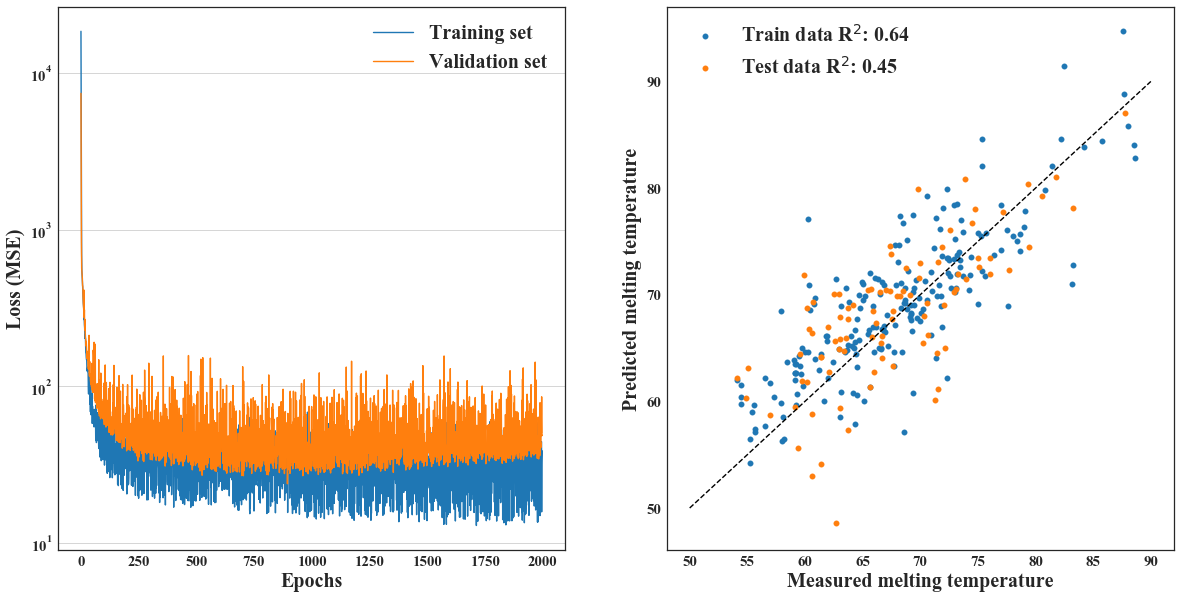

In [50]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 20}):
    f, ax = plt.subplots(1, 2, figsize=(20, 10))
    
    ax[0].semilogy(history.history['loss'], label='Training set')
    ax[0].semilogy(history.history['val_loss'], label='Validation set')
    ax[0].legend()
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss (MSE)')
    ax[0].grid(axis='y')
    
    model.load_weights('./bestRelAccess.h5')
    
    ax[1].scatter(y_train, model.predict(X_train), label='Train data R$^2$: {:.2f}'.
                  format(r2_score(y_train, model.predict(X_train))))
    ax[1].scatter(y_test, model.predict(X_test), label='Test data R$^2$: {:.2f}'.
                 format(r2_score(y_test, model.predict(X_test))))
    
    ax[1].plot([50, 90], [50, 90], linestyle='--',c='k')
    
#     ax[1].set_ylim(50, 90)
#     ax[1].set_xlim(50, 90)

#     ax[1].text(56, 81.2,
#              'Test set R$^2$: {:.2f}'.
#              format(r2_score(y_test, model.predict(X_test))),
#              {'size': 20})
#     ax[1].text(56, 83.2,
#              'Training set R$^2$: {:.2f}'.
#              format(r2_score(y_train, model.predict(X_train))),
#              {'size': 20})
    
    ax[1].legend()
    
    ax[1].set_ylabel('Predicted melting temperature')
    ax[1].set_xlabel('Measured melting temperature')

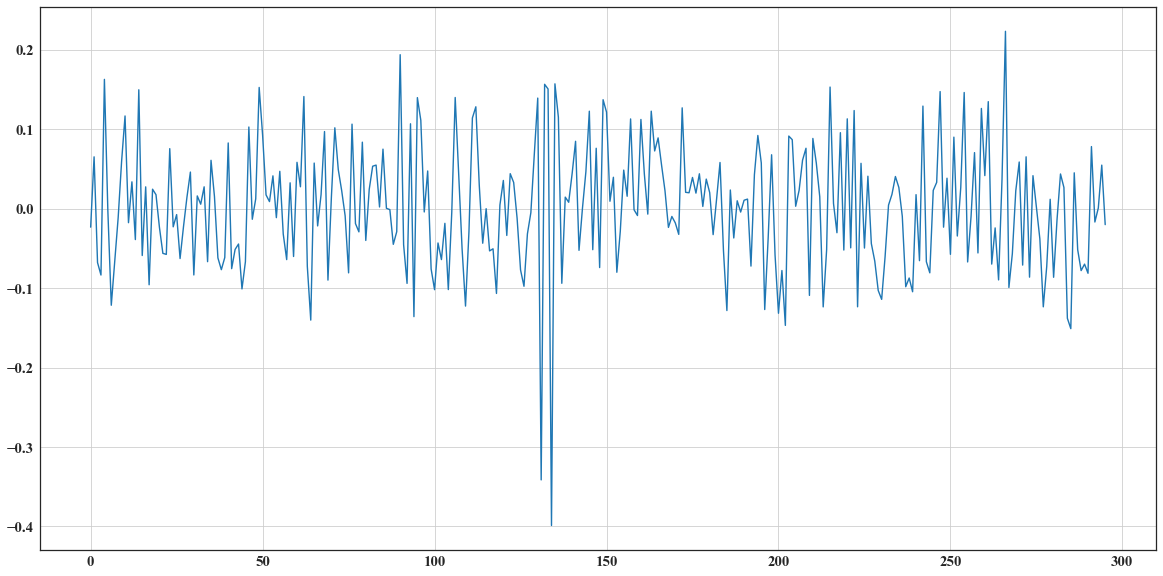

In [303]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 20}):
    f, ax = plt.subplots(1, 1, figsize=(20, 10))
    
    ax.plot(model.get_weights()[0])
    
    ax.grid()

In [258]:
data = pd.read_csv('/home/gil/PhD/Data/UCB/Data/Tm/Processed Data/AllTmData.csv', index_col=0)
data.index = ['P' + str(x) for x in data.index]

data = data.join(access_matrix)

data = data[~np.isnan(data['Tm D - Mean'])]

X = data.ix[:,4:].values.astype('float') 
X = ((X < 50) & (X > 0)).astype('int') * np.array([charges[int(x[1:])] for x in data.index])

y = data['Tm D - Mean'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1970)

/home/gil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [259]:
callbacks = ModelCheckpoint('./bestCharge50.h5', save_best_only=True)

history = model.fit(X_train, y_train, epochs=2000, validation_data=(X_test, y_test), callbacks=[callbacks])

Train on 212 samples, validate on 92 samples
Epoch 1/2000
212/212 [==============================] - 0s - loss: 4683.9192 - mean_squared_error: 4682.3492 - val_loss: 4598.9030 - val_mean_squared_error: 4597.3332
Epoch 2/2000
212/212 [==============================] - 0s - loss: 4674.7859 - mean_squared_error: 4673.2160 - val_loss: 4589.2936 - val_mean_squared_error: 4587.7233
Epoch 3/2000
212/212 [==============================] - 0s - loss: 4664.7463 - mean_squared_error: 4663.1756 - val_loss: 4578.4360 - val_mean_squared_error: 4576.8647
Epoch 4/2000
212/212 [==============================] - 0s - loss: 4653.3828 - mean_squared_error: 4651.8102 - val_loss: 4566.3386 - val_mean_squared_error: 4564.7639
Epoch 5/2000
212/212 [==============================] - 0s - loss: 4640.7584 - mean_squared_error: 4639.1818 - val_loss: 4553.0441 - val_mean_squared_error: 4551.4645
Epoch 6/2000
212/212 [==============================] - 0s - loss: 4626.9227 - mean_squared_error: 4625.3408 - val_loss:

212/212 [==============================] - 0s - loss: 3103.1910 - mean_squared_error: 3097.1030 - val_loss: 3054.2497 - val_mean_squared_error: 3048.1210
Epoch 98/2000
212/212 [==============================] - 0s - loss: 3088.2558 - mean_squared_error: 3082.0997 - val_loss: 3039.7171 - val_mean_squared_error: 3033.5191
Epoch 99/2000
212/212 [==============================] - 0s - loss: 3073.3632 - mean_squared_error: 3067.1372 - val_loss: 3025.0704 - val_mean_squared_error: 3018.8045
Epoch 100/2000
212/212 [==============================] - 0s - loss: 3058.3861 - mean_squared_error: 3052.0920 - val_loss: 3010.4807 - val_mean_squared_error: 3004.1462
Epoch 101/2000
212/212 [==============================] - 0s - loss: 3043.4565 - mean_squared_error: 3037.0945 - val_loss: 2996.0341 - val_mean_squared_error: 2989.6310
Epoch 102/2000
212/212 [==============================] - 0s - loss: 3028.6533 - mean_squared_error: 3022.2226 - val_loss: 2981.6360 - val_mean_squared_error: 2975.1639
Epo

212/212 [==============================] - 0s - loss: 1840.6967 - mean_squared_error: 1827.7112 - val_loss: 1821.8605 - val_mean_squared_error: 1808.8309
Epoch 194/2000
212/212 [==============================] - 0s - loss: 1829.4792 - mean_squared_error: 1816.4177 - val_loss: 1810.8193 - val_mean_squared_error: 1797.7151
Epoch 195/2000
212/212 [==============================] - 0s - loss: 1818.2427 - mean_squared_error: 1805.1082 - val_loss: 1799.7973 - val_mean_squared_error: 1786.6180
Epoch 196/2000
212/212 [==============================] - 0s - loss: 1807.0613 - mean_squared_error: 1793.8520 - val_loss: 1788.9277 - val_mean_squared_error: 1775.6734
Epoch 197/2000
212/212 [==============================] - 0s - loss: 1795.9655 - mean_squared_error: 1782.6828 - val_loss: 1778.0738 - val_mean_squared_error: 1764.7448
Epoch 198/2000
212/212 [==============================] - 0s - loss: 1784.9173 - mean_squared_error: 1771.5585 - val_loss: 1767.2627 - val_mean_squared_error: 1753.8587
E

212/212 [==============================] - 0s - loss: 940.7705 - mean_squared_error: 920.4190 - val_loss: 937.8404 - val_mean_squared_error: 917.4419
Epoch 290/2000
212/212 [==============================] - 0s - loss: 933.3436 - mean_squared_error: 912.9138 - val_loss: 930.4327 - val_mean_squared_error: 909.9552
Epoch 291/2000
212/212 [==============================] - 0s - loss: 925.8749 - mean_squared_error: 905.3660 - val_loss: 923.0764 - val_mean_squared_error: 902.5203
Epoch 292/2000
212/212 [==============================] - 0s - loss: 918.4818 - mean_squared_error: 897.8933 - val_loss: 915.7991 - val_mean_squared_error: 895.1641
Epoch 293/2000
212/212 [==============================] - 0s - loss: 911.0992 - mean_squared_error: 890.4332 - val_loss: 908.4524 - val_mean_squared_error: 887.7383
Epoch 294/2000
212/212 [==============================] - 0s - loss: 903.7269 - mean_squared_error: 882.9812 - val_loss: 901.2102 - val_mean_squared_error: 880.4169
Epoch 295/2000
212/212 [=

212/212 [==============================] - 0s - loss: 393.8216 - mean_squared_error: 365.9105 - val_loss: 393.4040 - val_mean_squared_error: 365.4474
Epoch 388/2000
212/212 [==============================] - 0s - loss: 390.1261 - mean_squared_error: 362.1405 - val_loss: 389.7685 - val_mean_squared_error: 361.7390
Epoch 389/2000
212/212 [==============================] - 0s - loss: 386.5074 - mean_squared_error: 358.4484 - val_loss: 386.0417 - val_mean_squared_error: 357.9382
Epoch 390/2000
212/212 [==============================] - 0s - loss: 382.8788 - mean_squared_error: 354.7471 - val_loss: 382.4265 - val_mean_squared_error: 354.2488
Epoch 391/2000
212/212 [==============================] - 0s - loss: 379.3162 - mean_squared_error: 351.1091 - val_loss: 378.8312 - val_mean_squared_error: 350.5810
Epoch 392/2000
212/212 [==============================] - 0s - loss: 375.8046 - mean_squared_error: 347.5261 - val_loss: 375.2937 - val_mean_squared_error: 346.9714
Epoch 393/2000
212/212 [=

212/212 [==============================] - 0s - loss: 194.0507 - mean_squared_error: 160.8501 - val_loss: 192.2223 - val_mean_squared_error: 159.0088
Epoch 486/2000
212/212 [==============================] - 0s - loss: 193.2941 - mean_squared_error: 160.0735 - val_loss: 191.4264 - val_mean_squared_error: 158.1844
Epoch 487/2000
212/212 [==============================] - 0s - loss: 192.5372 - mean_squared_error: 159.2852 - val_loss: 190.7871 - val_mean_squared_error: 157.5278
Epoch 488/2000
212/212 [==============================] - 0s - loss: 191.9000 - mean_squared_error: 158.6322 - val_loss: 190.1424 - val_mean_squared_error: 156.8634
Epoch 489/2000
212/212 [==============================] - 0s - loss: 191.2633 - mean_squared_error: 157.9765 - val_loss: 189.4748 - val_mean_squared_error: 156.1743
Epoch 490/2000
212/212 [==============================] - 0s - loss: 190.5873 - mean_squared_error: 157.2812 - val_loss: 188.8590 - val_mean_squared_error: 155.5406
Epoch 491/2000
212/212 [=

212/212 [==============================] - 0s - loss: 157.5501 - mean_squared_error: 124.3816 - val_loss: 158.3560 - val_mean_squared_error: 125.1920
Epoch 584/2000
212/212 [==============================] - 0s - loss: 157.3092 - mean_squared_error: 124.1461 - val_loss: 158.1536 - val_mean_squared_error: 125.0017
Epoch 585/2000
212/212 [==============================] - 0s - loss: 157.1039 - mean_squared_error: 123.9514 - val_loss: 157.9584 - val_mean_squared_error: 124.8208
Epoch 586/2000
212/212 [==============================] - 0s - loss: 156.8539 - mean_squared_error: 123.7206 - val_loss: 157.7630 - val_mean_squared_error: 124.6373
Epoch 587/2000
212/212 [==============================] - 0s - loss: 156.6218 - mean_squared_error: 123.4989 - val_loss: 157.5583 - val_mean_squared_error: 124.4457
Epoch 588/2000
212/212 [==============================] - 0s - loss: 156.3691 - mean_squared_error: 123.2601 - val_loss: 157.3407 - val_mean_squared_error: 124.2402
Epoch 589/2000
212/212 [=

212/212 [==============================] - 0s - loss: 137.9107 - mean_squared_error: 105.9578 - val_loss: 142.0042 - val_mean_squared_error: 110.0598
Epoch 682/2000
212/212 [==============================] - 0s - loss: 137.7375 - mean_squared_error: 105.7975 - val_loss: 141.8511 - val_mean_squared_error: 109.9155
Epoch 683/2000
212/212 [==============================] - 0s - loss: 137.5562 - mean_squared_error: 105.6247 - val_loss: 141.7053 - val_mean_squared_error: 109.7826
Epoch 684/2000
212/212 [==============================] - 0s - loss: 137.3806 - mean_squared_error: 105.4585 - val_loss: 141.5663 - val_mean_squared_error: 109.6578
Epoch 685/2000
212/212 [==============================] - 0s - loss: 137.1972 - mean_squared_error: 105.2957 - val_loss: 141.4032 - val_mean_squared_error: 109.5031
Epoch 686/2000
212/212 [==============================] - 0s - loss: 137.0157 - mean_squared_error: 105.1185 - val_loss: 141.2497 - val_mean_squared_error: 109.3612
Epoch 687/2000
212/212 [=

212/212 [==============================] - 0s - loss: 123.4468 - mean_squared_error: 92.5674 - val_loss: 131.1344 - val_mean_squared_error: 100.2642
Epoch 781/2000
212/212 [==============================] - 0s - loss: 123.3289 - mean_squared_error: 92.4668 - val_loss: 131.0423 - val_mean_squared_error: 100.1805
Epoch 782/2000
212/212 [==============================] - 0s - loss: 123.2406 - mean_squared_error: 92.3926 - val_loss: 130.9572 - val_mean_squared_error: 100.1038
Epoch 783/2000
212/212 [==============================] - 0s - loss: 123.1050 - mean_squared_error: 92.2520 - val_loss: 130.8793 - val_mean_squared_error: 100.0401
Epoch 784/2000
212/212 [==============================] - 0s - loss: 122.9735 - mean_squared_error: 92.1438 - val_loss: 130.8013 - val_mean_squared_error: 99.9694
Epoch 785/2000
212/212 [==============================] - 0s - loss: 122.8825 - mean_squared_error: 92.0566 - val_loss: 130.7171 - val_mean_squared_error: 99.8917
Epoch 786/2000
212/212 [=========

212/212 [==============================] - 0s - loss: 113.2556 - mean_squared_error: 83.1041 - val_loss: 124.3988 - val_mean_squared_error: 94.2522
Epoch 881/2000
212/212 [==============================] - 0s - loss: 113.1811 - mean_squared_error: 83.0431 - val_loss: 124.3510 - val_mean_squared_error: 94.2125
Epoch 882/2000
212/212 [==============================] - 0s - loss: 113.0799 - mean_squared_error: 82.9399 - val_loss: 124.2968 - val_mean_squared_error: 94.1643
Epoch 883/2000
212/212 [==============================] - 0s - loss: 113.0078 - mean_squared_error: 82.8835 - val_loss: 124.2474 - val_mean_squared_error: 94.1198
Epoch 884/2000
212/212 [==============================] - 0s - loss: 112.9039 - mean_squared_error: 82.7755 - val_loss: 124.1897 - val_mean_squared_error: 94.0723
Epoch 885/2000
212/212 [==============================] - 0s - loss: 112.8359 - mean_squared_error: 82.7244 - val_loss: 124.1273 - val_mean_squared_error: 94.0151
Epoch 886/2000
212/212 [=============

212/212 [==============================] - 0s - loss: 105.7763 - mean_squared_error: 76.1277 - val_loss: 120.1611 - val_mean_squared_error: 90.5118
Epoch 981/2000
212/212 [==============================] - 0s - loss: 105.7154 - mean_squared_error: 76.0641 - val_loss: 120.1228 - val_mean_squared_error: 90.4784
Epoch 982/2000
212/212 [==============================] - 0s - loss: 105.6472 - mean_squared_error: 76.0016 - val_loss: 120.0931 - val_mean_squared_error: 90.4499
Epoch 983/2000
212/212 [==============================] - 0s - loss: 105.5811 - mean_squared_error: 75.9386 - val_loss: 120.0631 - val_mean_squared_error: 90.4238
Epoch 984/2000
212/212 [==============================] - 0s - loss: 105.5180 - mean_squared_error: 75.8779 - val_loss: 120.0394 - val_mean_squared_error: 90.4017
Epoch 985/2000
212/212 [==============================] - 0s - loss: 105.4642 - mean_squared_error: 75.8262 - val_loss: 120.0109 - val_mean_squared_error: 90.3754
Epoch 986/2000
212/212 [=============

212/212 [==============================] - 0s - loss: 100.4290 - mean_squared_error: 70.9674 - val_loss: 117.5097 - val_mean_squared_error: 88.0471
Epoch 1081/2000
212/212 [==============================] - 0s - loss: 100.3800 - mean_squared_error: 70.9192 - val_loss: 117.4902 - val_mean_squared_error: 88.0285
Epoch 1082/2000
212/212 [==============================] - 0s - loss: 100.3211 - mean_squared_error: 70.8546 - val_loss: 117.4720 - val_mean_squared_error: 88.0146
Epoch 1083/2000
212/212 [==============================] - 0s - loss: 100.3053 - mean_squared_error: 70.8475 - val_loss: 117.4617 - val_mean_squared_error: 88.0042
Epoch 1084/2000
212/212 [==============================] - 0s - loss: 100.2417 - mean_squared_error: 70.7834 - val_loss: 117.4440 - val_mean_squared_error: 87.9923
Epoch 1085/2000
212/212 [==============================] - 0s - loss: 100.2012 - mean_squared_error: 70.7438 - val_loss: 117.4224 - val_mean_squared_error: 87.9744
Epoch 1086/2000
212/212 [=======

212/212 [==============================] - 0s - loss: 96.2249 - mean_squared_error: 66.9399 - val_loss: 115.6886 - val_mean_squared_error: 86.4112
Epoch 1181/2000
212/212 [==============================] - 0s - loss: 96.1763 - mean_squared_error: 66.9035 - val_loss: 115.6734 - val_mean_squared_error: 86.3950
Epoch 1182/2000
212/212 [==============================] - 0s - loss: 96.1422 - mean_squared_error: 66.8652 - val_loss: 115.6513 - val_mean_squared_error: 86.3732
Epoch 1183/2000
212/212 [==============================] - 0s - loss: 96.0948 - mean_squared_error: 66.8175 - val_loss: 115.6319 - val_mean_squared_error: 86.3583
Epoch 1184/2000
212/212 [==============================] - 0s - loss: 96.0537 - mean_squared_error: 66.7743 - val_loss: 115.6069 - val_mean_squared_error: 86.3376
Epoch 1185/2000
212/212 [==============================] - 0s - loss: 96.0256 - mean_squared_error: 66.7583 - val_loss: 115.5968 - val_mean_squared_error: 86.3316
Epoch 1186/2000
212/212 [=============

212/212 [==============================] - 0s - loss: 92.7761 - mean_squared_error: 63.6652 - val_loss: 114.3045 - val_mean_squared_error: 85.1910
Epoch 1281/2000
212/212 [==============================] - 0s - loss: 92.7373 - mean_squared_error: 63.6224 - val_loss: 114.2917 - val_mean_squared_error: 85.1805
Epoch 1282/2000
212/212 [==============================] - 0s - loss: 92.6994 - mean_squared_error: 63.5894 - val_loss: 114.2811 - val_mean_squared_error: 85.1726
Epoch 1283/2000
212/212 [==============================] - 0s - loss: 92.6880 - mean_squared_error: 63.5818 - val_loss: 114.2709 - val_mean_squared_error: 85.1617
Epoch 1284/2000
212/212 [==============================] - 0s - loss: 92.6401 - mean_squared_error: 63.5289 - val_loss: 114.2597 - val_mean_squared_error: 85.1525
Epoch 1285/2000
212/212 [==============================] - 0s - loss: 92.6252 - mean_squared_error: 63.5118 - val_loss: 114.2460 - val_mean_squared_error: 85.1435
Epoch 1286/2000
212/212 [=============

212/212 [==============================] - 0s - loss: 89.9587 - mean_squared_error: 61.0349 - val_loss: 113.1760 - val_mean_squared_error: 84.2447
Epoch 1381/2000
212/212 [==============================] - 0s - loss: 89.9100 - mean_squared_error: 60.9769 - val_loss: 113.1657 - val_mean_squared_error: 84.2357
Epoch 1382/2000
212/212 [==============================] - 0s - loss: 89.8870 - mean_squared_error: 60.9565 - val_loss: 113.1564 - val_mean_squared_error: 84.2301
Epoch 1383/2000
212/212 [==============================] - 0s - loss: 89.8661 - mean_squared_error: 60.9404 - val_loss: 113.1464 - val_mean_squared_error: 84.2208
Epoch 1384/2000
212/212 [==============================] - 0s - loss: 89.8456 - mean_squared_error: 60.9201 - val_loss: 113.1277 - val_mean_squared_error: 84.2016
Epoch 1385/2000
212/212 [==============================] - 0s - loss: 89.8147 - mean_squared_error: 60.8869 - val_loss: 113.1142 - val_mean_squared_error: 84.1907
Epoch 1386/2000
212/212 [=============

212/212 [==============================] - 0s - loss: 87.5052 - mean_squared_error: 58.7749 - val_loss: 112.1229 - val_mean_squared_error: 83.3906
Epoch 1481/2000
212/212 [==============================] - 0s - loss: 87.4650 - mean_squared_error: 58.7327 - val_loss: 112.1219 - val_mean_squared_error: 83.3922
Epoch 1482/2000
212/212 [==============================] - 0s - loss: 87.4447 - mean_squared_error: 58.7174 - val_loss: 112.1069 - val_mean_squared_error: 83.3766
Epoch 1483/2000
212/212 [==============================] - 0s - loss: 87.4258 - mean_squared_error: 58.6905 - val_loss: 112.0946 - val_mean_squared_error: 83.3693
Epoch 1484/2000
212/212 [==============================] - 0s - loss: 87.4285 - mean_squared_error: 58.7105 - val_loss: 112.0797 - val_mean_squared_error: 83.3545
Epoch 1485/2000
212/212 [==============================] - 0s - loss: 87.3806 - mean_squared_error: 58.6553 - val_loss: 112.0710 - val_mean_squared_error: 83.3493
Epoch 1486/2000
212/212 [=============

212/212 [==============================] - 0s - loss: 86.4397 - mean_squared_error: 57.7941 - val_loss: 111.6113 - val_mean_squared_error: 82.9727
Epoch 1531/2000
212/212 [==============================] - 0s - loss: 86.4265 - mean_squared_error: 57.7872 - val_loss: 111.6097 - val_mean_squared_error: 82.9732
Epoch 1532/2000
212/212 [==============================] - 0s - loss: 86.4062 - mean_squared_error: 57.7649 - val_loss: 111.6078 - val_mean_squared_error: 82.9727
Epoch 1533/2000
212/212 [==============================] - 0s - loss: 86.4020 - mean_squared_error: 57.7691 - val_loss: 111.5981 - val_mean_squared_error: 82.9617
Epoch 1534/2000
212/212 [==============================] - 0s - loss: 86.3688 - mean_squared_error: 57.7304 - val_loss: 111.5925 - val_mean_squared_error: 82.9585
Epoch 1535/2000
212/212 [==============================] - 0s - loss: 86.3489 - mean_squared_error: 57.7144 - val_loss: 111.5884 - val_mean_squared_error: 82.9540
Epoch 1536/2000
212/212 [=============

212/212 [==============================] - 0s - loss: 84.6707 - mean_squared_error: 56.1587 - val_loss: 110.9343 - val_mean_squared_error: 82.4260
Epoch 1631/2000
212/212 [==============================] - 0s - loss: 84.6568 - mean_squared_error: 56.1504 - val_loss: 110.9302 - val_mean_squared_error: 82.4242
Epoch 1632/2000
212/212 [==============================] - 0s - loss: 84.6441 - mean_squared_error: 56.1303 - val_loss: 110.9258 - val_mean_squared_error: 82.4244
Epoch 1633/2000
212/212 [==============================] - 0s - loss: 84.6198 - mean_squared_error: 56.1156 - val_loss: 110.9107 - val_mean_squared_error: 82.4109
Epoch 1634/2000
212/212 [==============================] - 0s - loss: 84.6056 - mean_squared_error: 56.1012 - val_loss: 110.9086 - val_mean_squared_error: 82.4136
Epoch 1635/2000
212/212 [==============================] - 0s - loss: 84.5895 - mean_squared_error: 56.0952 - val_loss: 110.9008 - val_mean_squared_error: 82.4062
Epoch 1636/2000
212/212 [=============

212/212 [==============================] - 0s - loss: 83.0806 - mean_squared_error: 54.7368 - val_loss: 110.1826 - val_mean_squared_error: 81.8399
Epoch 1731/2000
212/212 [==============================] - 0s - loss: 83.0729 - mean_squared_error: 54.7287 - val_loss: 110.1758 - val_mean_squared_error: 81.8377
Epoch 1732/2000
212/212 [==============================] - 0s - loss: 83.0403 - mean_squared_error: 54.7051 - val_loss: 110.1624 - val_mean_squared_error: 81.8250
Epoch 1733/2000
212/212 [==============================] - 0s - loss: 83.0311 - mean_squared_error: 54.6955 - val_loss: 110.1465 - val_mean_squared_error: 81.8083
Epoch 1734/2000
212/212 [==============================] - 0s - loss: 83.0089 - mean_squared_error: 54.6686 - val_loss: 110.1378 - val_mean_squared_error: 81.8038
Epoch 1735/2000
212/212 [==============================] - 0s - loss: 82.9982 - mean_squared_error: 54.6626 - val_loss: 110.1264 - val_mean_squared_error: 81.7925
Epoch 1736/2000
212/212 [=============

212/212 [==============================] - 0s - loss: 81.7476 - mean_squared_error: 53.5435 - val_loss: 109.5986 - val_mean_squared_error: 81.4014
Epoch 1831/2000
212/212 [==============================] - 0s - loss: 81.7327 - mean_squared_error: 53.5387 - val_loss: 109.6025 - val_mean_squared_error: 81.4042
Epoch 1832/2000
212/212 [==============================] - 0s - loss: 81.7201 - mean_squared_error: 53.5234 - val_loss: 109.5961 - val_mean_squared_error: 81.3990
Epoch 1833/2000
212/212 [==============================] - 0s - loss: 81.7277 - mean_squared_error: 53.5302 - val_loss: 109.6010 - val_mean_squared_error: 81.4039
Epoch 1834/2000
212/212 [==============================] - 0s - loss: 81.6998 - mean_squared_error: 53.5030 - val_loss: 109.5910 - val_mean_squared_error: 81.3937
Epoch 1835/2000
212/212 [==============================] - 0s - loss: 81.7016 - mean_squared_error: 53.4964 - val_loss: 109.5898 - val_mean_squared_error: 81.3953
Epoch 1836/2000
212/212 [=============

212/212 [==============================] - 0s - loss: 81.1885 - mean_squared_error: 53.0497 - val_loss: 109.4180 - val_mean_squared_error: 81.2778
Epoch 1881/2000
212/212 [==============================] - 0s - loss: 81.1849 - mean_squared_error: 53.0457 - val_loss: 109.4115 - val_mean_squared_error: 81.2729
Epoch 1882/2000
212/212 [==============================] - 0s - loss: 81.1660 - mean_squared_error: 53.0302 - val_loss: 109.4032 - val_mean_squared_error: 81.2635
Epoch 1883/2000
212/212 [==============================] - 0s - loss: 81.1790 - mean_squared_error: 53.0317 - val_loss: 109.4150 - val_mean_squared_error: 81.2793
Epoch 1884/2000
212/212 [==============================] - 0s - loss: 81.1517 - mean_squared_error: 53.0207 - val_loss: 109.4148 - val_mean_squared_error: 81.2769
Epoch 1885/2000
212/212 [==============================] - 0s - loss: 81.1317 - mean_squared_error: 52.9937 - val_loss: 109.4100 - val_mean_squared_error: 81.2740
Epoch 1886/2000
212/212 [=============

212/212 [==============================] - 0s - loss: 80.1130 - mean_squared_error: 52.0886 - val_loss: 108.8880 - val_mean_squared_error: 80.8623
Epoch 1980/2000
212/212 [==============================] - 0s - loss: 80.1003 - mean_squared_error: 52.0726 - val_loss: 108.8814 - val_mean_squared_error: 80.8585
Epoch 1981/2000
212/212 [==============================] - 0s - loss: 80.0867 - mean_squared_error: 52.0638 - val_loss: 108.8781 - val_mean_squared_error: 80.8581
Epoch 1982/2000
212/212 [==============================] - 0s - loss: 80.0741 - mean_squared_error: 52.0617 - val_loss: 108.8710 - val_mean_squared_error: 80.8491
Epoch 1983/2000
212/212 [==============================] - 0s - loss: 80.0691 - mean_squared_error: 52.0515 - val_loss: 108.8700 - val_mean_squared_error: 80.8489
Epoch 1984/2000
212/212 [==============================] - 0s - loss: 80.0557 - mean_squared_error: 52.0371 - val_loss: 108.8638 - val_mean_squared_error: 80.8460
Epoch 1985/2000
212/212 [=============

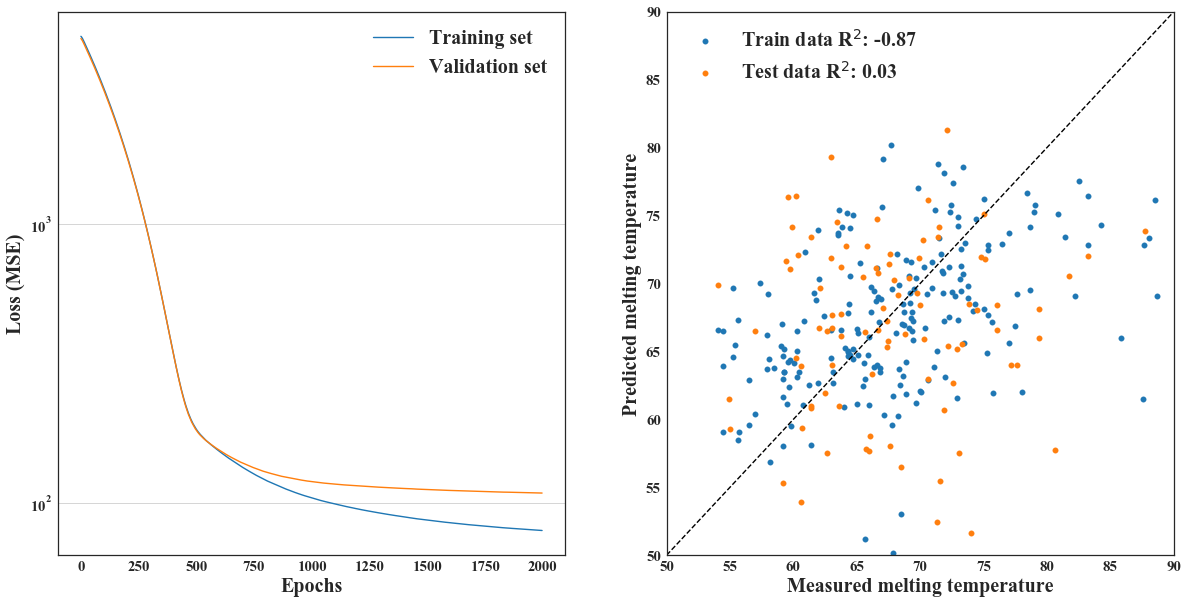

In [260]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 20}):
    f, ax = plt.subplots(1, 2, figsize=(20, 10))
    
    ax[0].semilogy(history.history['loss'], label='Training set')
    ax[0].semilogy(history.history['val_loss'], label='Validation set')
    ax[0].legend()
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss (MSE)')
    ax[0].grid(axis='y')
    
    ax[1].scatter(y_train, model.predict(X_train), label='Train data R$^2$: {:.2f}'.
                  format(r2_score(y_test, model.predict(X_test))))
    ax[1].scatter(y_test, model.predict(X_test), label='Test data R$^2$: {:.2f}'.
                 format(r2_score(y_train, model.predict(X_train))))
    
    ax[1].plot([50, 90], [50, 90], linestyle='--',c='k')
    
    ax[1].set_ylim(50, 90)
    ax[1].set_xlim(50, 90)

#     ax[1].text(56, 81.2,
#              'Test set R$^2$: {:.2f}'.
#              format(r2_score(y_test, model.predict(X_test))),
#              {'size': 20})
#     ax[1].text(56, 83.2,
#              'Training set R$^2$: {:.2f}'.
#              format(r2_score(y_train, model.predict(X_train))),
#              {'size': 20})
    
    ax[1].legend()
    
    ax[1].set_ylabel('Predicted melting temperature')
    ax[1].set_xlabel('Measured melting temperature')